# **1. Preparation**

## **1.1 Library Import**

Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from google.colab import files

## **1.2 Data Loading**

In [2]:


from google.colab import files
uploaded = files.upload()

df=pd.read_csv('Employee-Attrition - Employee-Attrition.csv')
df

Saving Employee-Attrition - Employee-Attrition.csv to Employee-Attrition - Employee-Attrition.csv


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## **1.3 Data Preparation**

### 1.3.1 Dataset Summary

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
for feature in df.select_dtypes(include='object'):
    print(feature)
    print(df[feature].unique(), '\n')

Attrition
['Yes' 'No'] 

BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

Department
['Sales' 'Research & Development' 'Human Resources'] 

EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Gender
['Female' 'Male'] 

JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'] 

MaritalStatus
['Single' 'Married' 'Divorced'] 

Over18
['Y'] 

OverTime
['Yes' 'No'] 



Dataset descriptive statistics for numerical and categorical (object) data

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


Based on the analysis of descriptive statistics, all employees are over 18 years old which can be seen in the unique `Over18` feature only 1 data, `Y`. In addition, the `EmployeeCount` feature also only has 1 unique value. So we can eliminate these 2 features because they do not have a major influence on business problems

In [7]:
df = df.drop(['Over18', 'EmployeeCount'], axis=1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,4,80,0,17,3,2,9,6,0,8


### 1.3.2 Missing Value and Duplicate Data Handling

Check for missing value

In [8]:
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

Displaying data that has missing values

In [9]:
df[df.isnull().any(axis=1)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


Since the dataset has several missing value in the `Attrition` feature, which is the main data feature based on the business problem to be solved, we need to drop the missing value data.

In [10]:
df.dropna(inplace=True)
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

Check the amount of data row after the missing value handling process

In [11]:
df.shape

(1470, 33)

Check for data duplicates

In [12]:
df.duplicated().sum()

np.int64(0)

Check the `Attrition` data type

In [13]:
df['Attrition'].dtypes

dtype('O')

Change the `Attrition` data feature from float to integer, since we already clean it

In [14]:
# Change the 'Attrition' column to 1 and 0 before converting to int
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Now convert the 'Attrition' column to integers
df['Attrition'] = df['Attrition'].astype(int)
df['Attrition'].dtypes

dtype('int64')

### 1.3.3 Ordinal Decoding

Ordinal Decoding for below features:

| Features | 1 | 2 | 3 | 4 | 5 |
|----------|---|---|---|---|---|
| Education                | Below College | College | Bachelor | Master | Doctor |
| EnvironmentSatisfaction  | Low | Medium | High      | Very High   | - |
| JobInvolvement           | Low | Medium | High      | Very High   | - |
| JobSatisfaction          | Low | Medium | High      | Very High   | - |
| PerformanceRating        | Low | Good   | Excellent | Outstanding | - |
| RelationshipSatisfaction | Low | Medium | High      | Very High   | - |
| WorkLifeBalance          | Low | Good   | Excellent | Outstanding | - |

In [15]:
def ordinal_decoding(df, feature):
    """
    Convert encoded feature in a DataFrame to corresponding categorical labels

    Parameters
        df (pandas.DataFrame) : The DataFrame with feature(s) to be converted
        feature (str or list of str) : The feature name(s) to convert

    Returns
        pandas.DataFrame : The DataFrame with feature(s) as categorical labels
    """

    if feature == 'Attrition':
        category = {0: 'No', 1: 'Yes'}
        df[feature] = df[feature].map(category)
    elif feature == 'Education':
        category = {1: 'Below College', 2: 'College', 3: 'Bachelor',
                    4: 'Master', 5: 'Doctor'}
        df[feature] = df[feature].map(category)
    elif feature in ['WorkLifeBalance', 'PerformanceRating']:
        category = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
        df[feature] = df[feature].map(category)
    else:
        category = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
        for f in feature:
            df[f] = df[f].map(category)

    return df

Convert the numerical data to categorical data using the defined function

In [16]:
df = ordinal_decoding(df, 'Attrition')
df = ordinal_decoding(df, 'Education')
df = ordinal_decoding(df, ['EnvironmentSatisfaction', 'JobInvolvement',
                           'JobSatisfaction', 'RelationshipSatisfaction'])
df = ordinal_decoding(df, ['PerformanceRating', 'WorkLifeBalance'])

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Medium,...,Low,80,0,8,0,Low,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,High,...,Very High,80,1,10,3,High,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Very High,...,Medium,80,0,7,3,High,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,Very High,...,High,80,0,8,3,High,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,7,Low,...,Very High,80,1,6,3,High,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,2061,High,...,High,80,1,17,3,High,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,2062,Very High,...,Low,80,1,9,5,High,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,2064,Medium,...,Medium,80,1,6,0,High,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,2065,Very High,...,Very High,80,0,17,3,Medium,9,6,0,8


### 1.3.4 Cleaned Data Export

Export the cleaned dataset

In [17]:
# Dataset for Business Dashboard
df.to_csv('employee_data_cleaned.csv', index=False)

# **2. Data Understanding**

Check the dataset descriptive statistics summary for numerical and categorical data

In [18]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470,1470,1470.000000,1470,...,1470,1470.0,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,5,6,NaN,4,...,4,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,Bachelor,Life Sciences,NaN,High,...,High,NaN,NaN,NaN,NaN,High,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,572,606,NaN,453,...,459,NaN,NaN,NaN,NaN,893,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,NaN,NaN,1024.865306,NaN,...,NaN,80.0,0.793878,11.279592,2.799320,NaN,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,NaN,NaN,602.024335,NaN,...,NaN,0.0,0.852077,7.780782,1.289271,NaN,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,...,NaN,80.0,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,NaN,NaN,491.250000,NaN,...,NaN,80.0,0.000000,6.000000,2.000000,NaN,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,NaN,NaN,1020.500000,NaN,...,NaN,80.0,1.000000,10.000000,3.000000,NaN,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,NaN,NaN,1555.750000,NaN,...,NaN,80.0,1.000000,15.000000,3.000000,NaN,9.000000,7.000000,3.000000,7.000000


## **2.1 Heatmap Correlation Matrix**

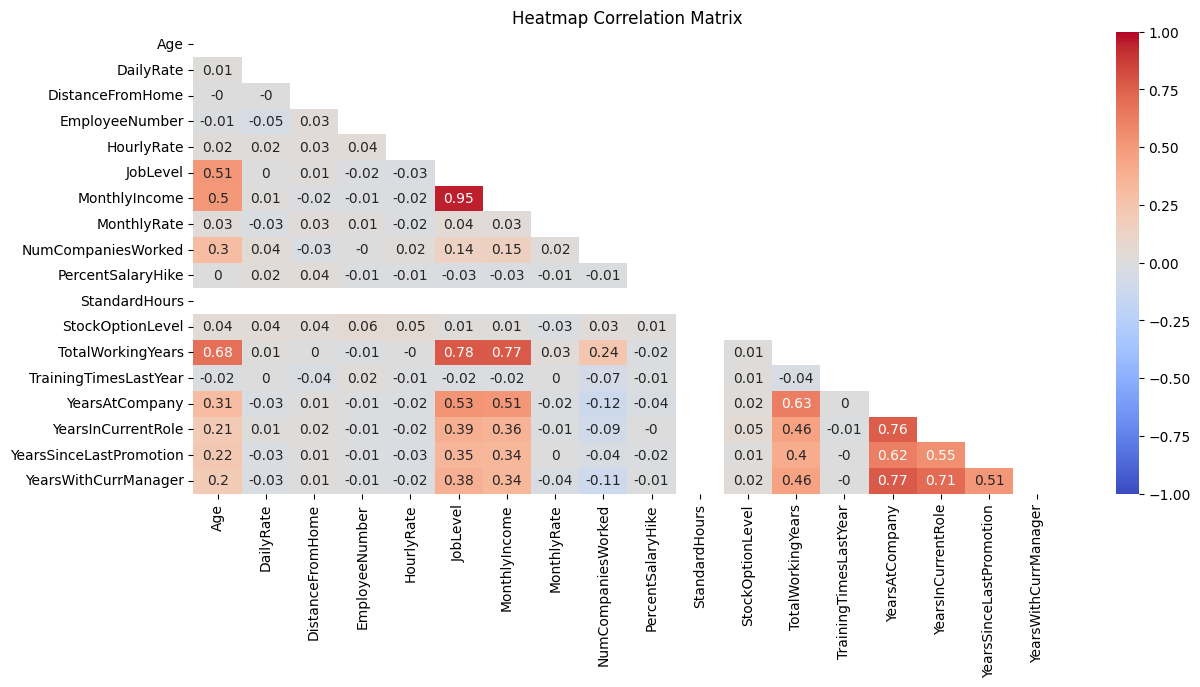

In [19]:
plt.figure(figsize=(14, 6))
correlation_matrix = df.corr(numeric_only=True).round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1,annot=True, cmap='coolwarm', mask=mask)
plt.title('Heatmap Correlation Matrix')
plt.show()

Based on the correlation matrix plot above, we can conclude:
1. `Age` has a fairly strong positive correlation with `TotalWorkingYears`, because as age increases, the total years of work are relatively longer.
2. `Age` has a fairly strong positive correlation with `JobLevel`, because as employees get older, employees will generally occupy a higher position in the company.
3. `Age` has a fairly strong positive correlation with `MonthlyIncome`, because as employees get older, employees will generally get a bigger income.
4. `JobLevel` has a very strong positive correlation with `MonthlyIncome`, because more senior employees tend to earn higher incomes.
5. `JobLevel` has a very strong positive correlation with `TotalWorkingYears`, because more senior employees generally have experience and have worked for a longer period of time.
6. `JobLevel` has a fairly strong positive correlation with `YeasAtCompany`, because more senior employees tend to have worked for many years in the same company.
7. `MonthlyIncome` has a very strong positive correlation with `TotalWorkingYears`, because the higher the income, the longer the total number of years of work.
8. `MonthlyIncome` has a fairly strong positive correlation with `YearsAtCompany`, because the higher the income, generally the longer employees have worked at the same company.
9. `TotalWorkingYears` has a fairly strong positive correlation with `YearsAtCompany`, because the longer the span of years of work, generally the longer employees have worked at the same company.
10. `YearsAtCompany` has a very strong positive correlation with `YearsInCurrentRole`.
11. `YearsAtCompany` has a very strong positive correlation with `YearsWithCurrentManager`.
12. `YearsAtCompany` has a fairly strong positive correlation with `YearsSinceLastPromotion`.
13. `YearsInCurrentRole` has a very strong positive correlation with `YearsWithCurrentManager`.
14. `YearsInCurrentRole` has a fairly strong positive correlation with `YearsSinceLastPromotion`.
15. `YearsSinceLastPromotion` has a fairly strong positive correlation with `YearsWithCurrentManager`.

## **2.2 Univariate Analysis**

In [20]:
numerical, categorical = [], []

for feature in df.columns:
    if df[feature].dtype != 'object':
        numerical.append(feature)
    else:
        categorical.append(feature)

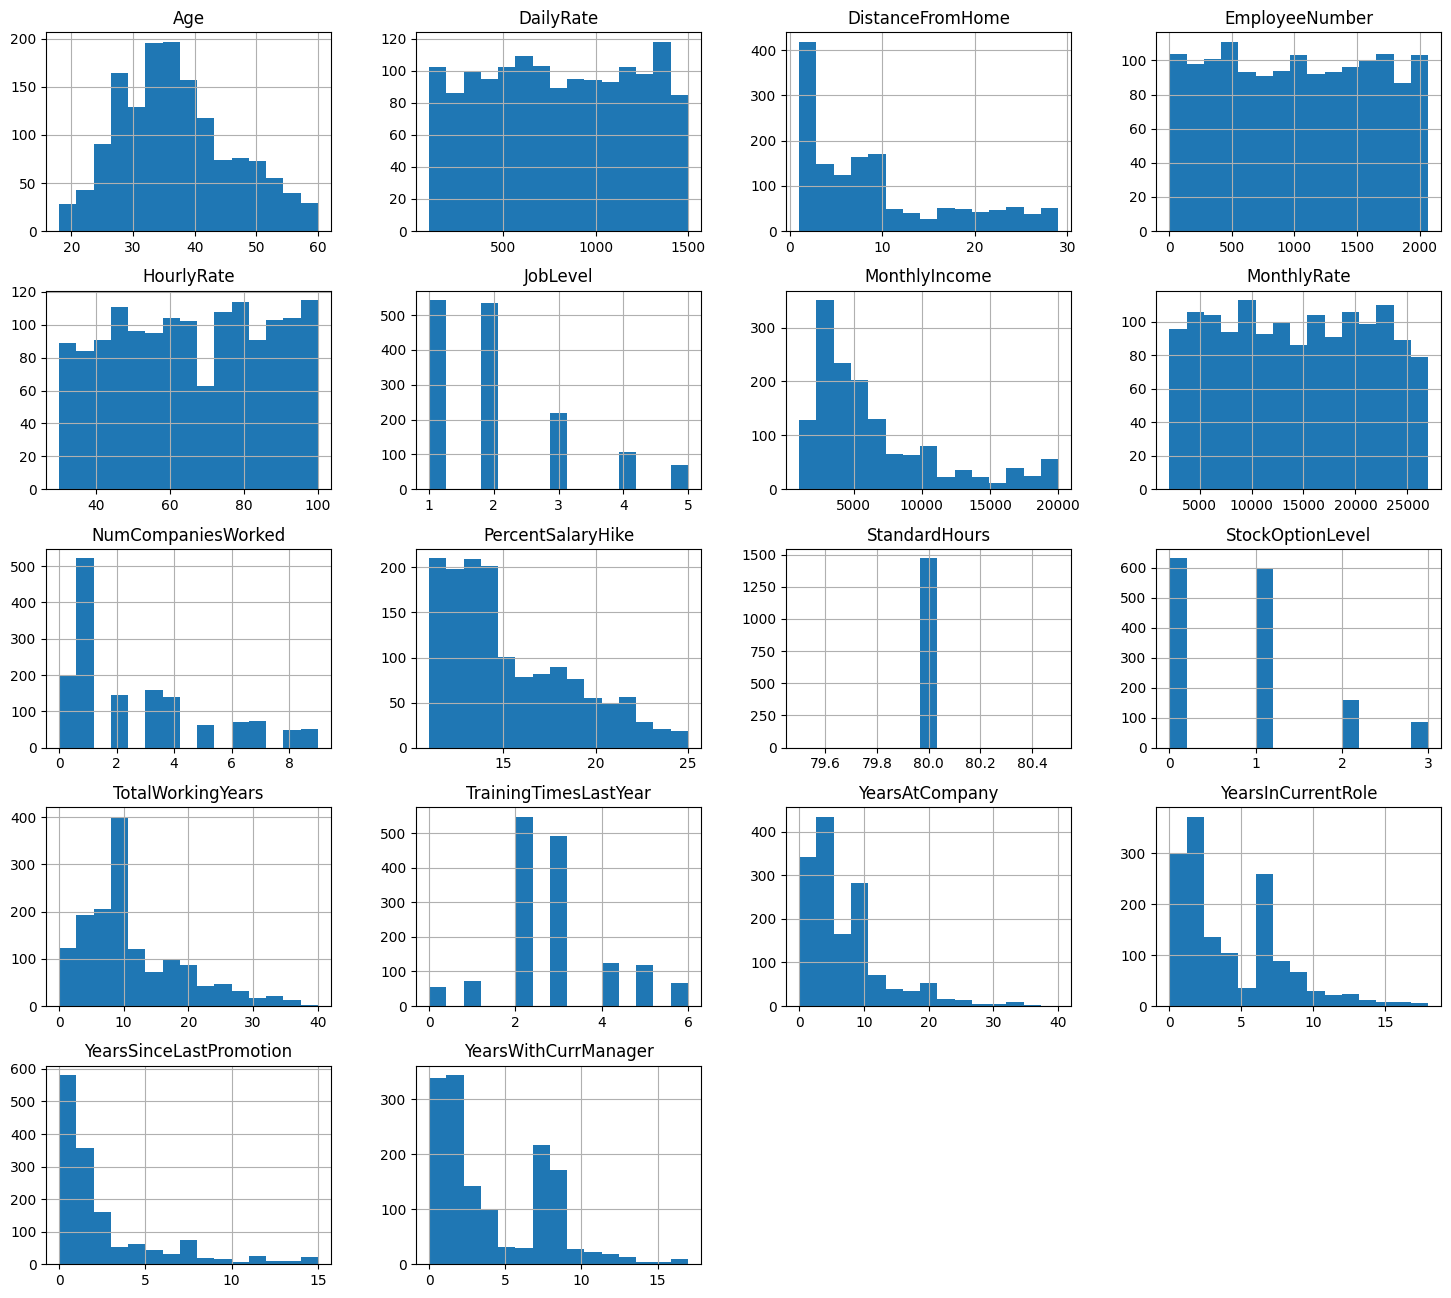

In [21]:
# @title ### 2.2.1 Numerical Univariate Analysis
df[numerical].hist(bins=15, figsize=(18, 16))
plt.show()

Based on the graph above, we can see that there are several numeric features that are in the form of right-skewed distribution, such as DistanceFromHome, MonhtlyIncome, NumCompaniesWorked, PercentageSalaryHike, TotalWorkingYears, YearsAtCompany, YearsCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager. On the other hand, the Age and TrainingTimeLastYear features are classified as normal distribution.

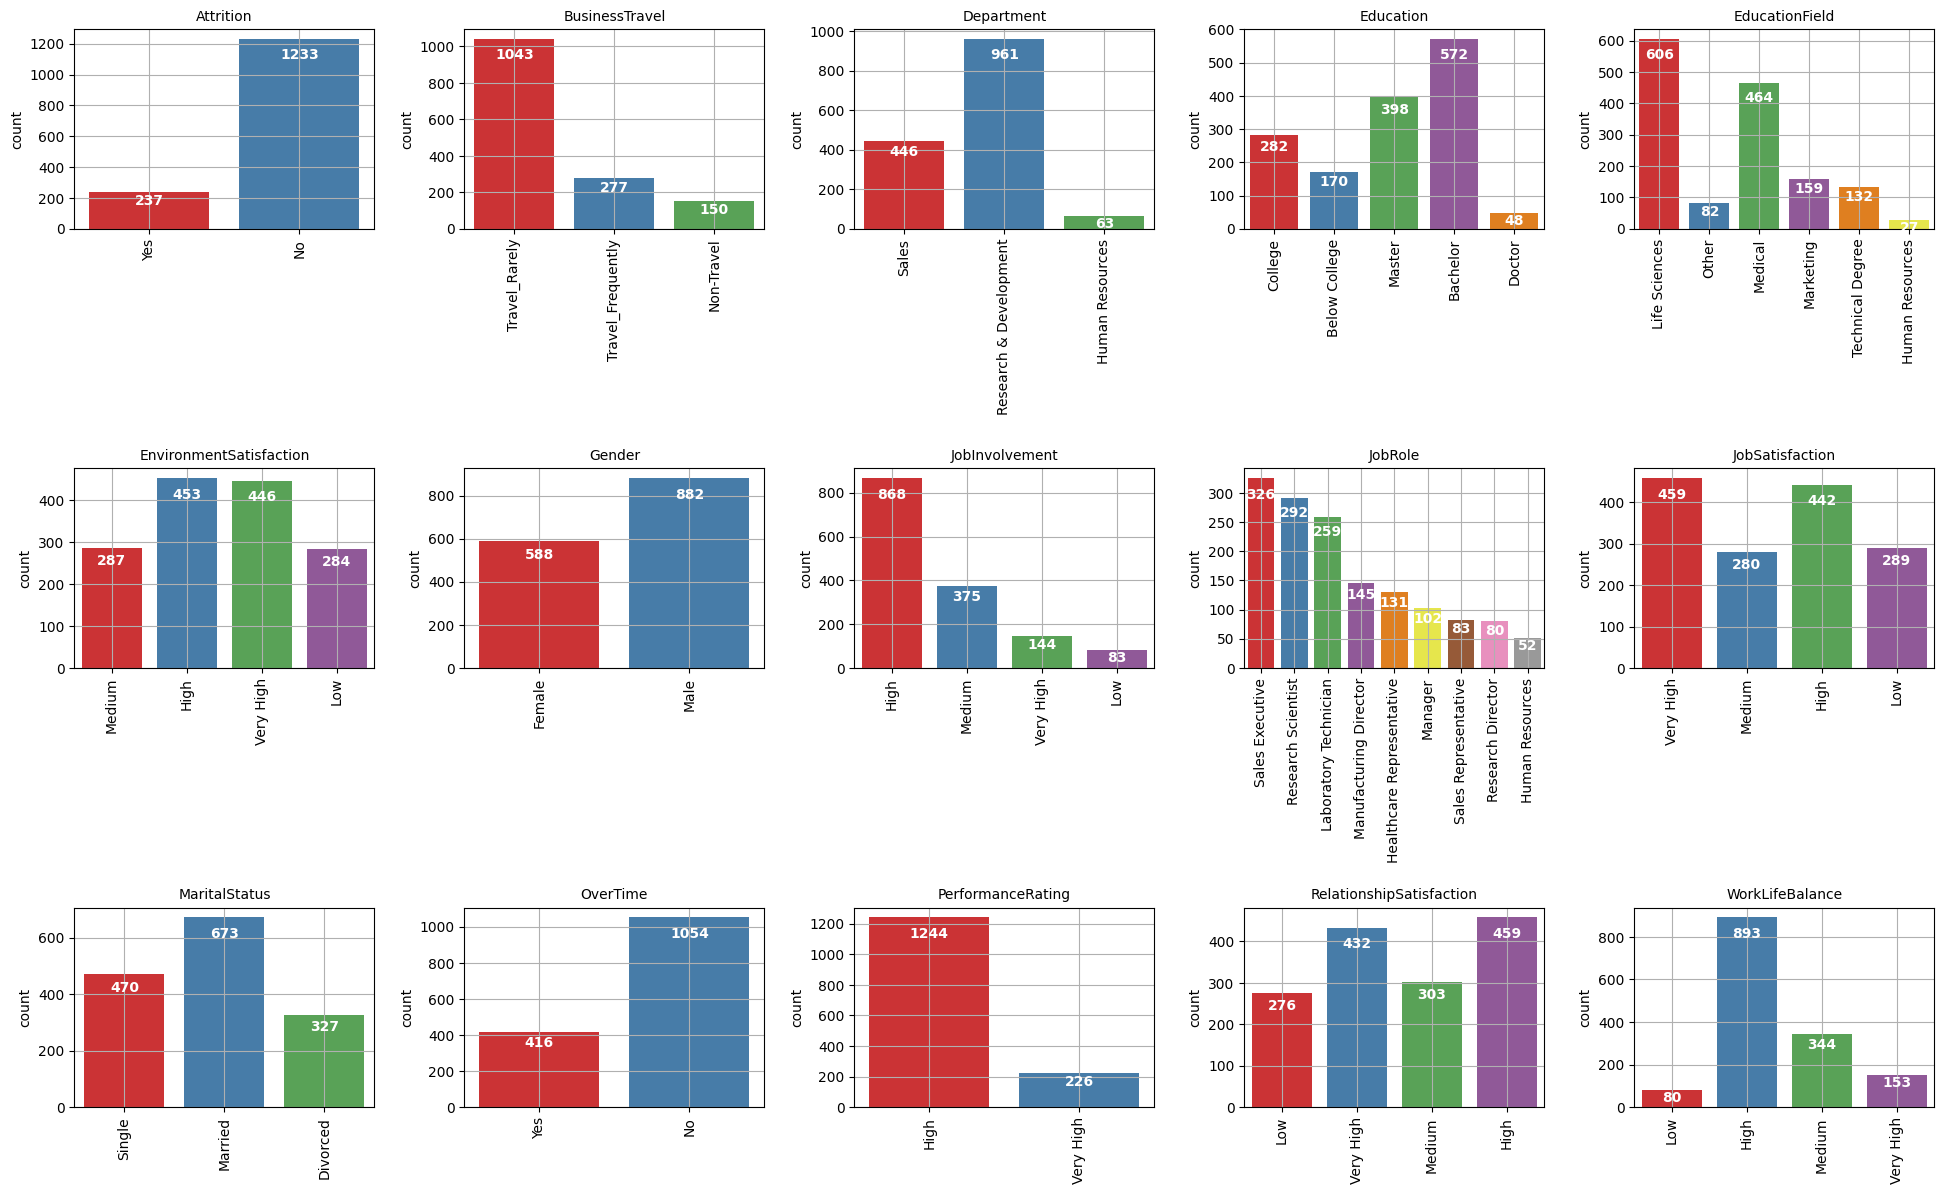

In [22]:
# @title ### 2.2.2 Categorical Univariate Analysis
fig, ax = plt.subplots(3, 5, figsize=(24, 14))
for i, feature in enumerate(categorical):
    # Get the row and column index for each subplot
    row = i // 5
    col = i % 5
    sns.countplot(data=df, x=feature, ax=ax[row, col], hue=feature, palette='Set1')
    ax[row, col].set_title(feature, fontsize=10)
    ax[row, col].set_xlabel('')
    ax[row, col].grid()

    # Give count label each bar
    for bar in ax[row, col].patches:
        ax[row, col].annotate(
            str(int(bar.get_height())),
            (bar.get_x() + bar.get_width() / 2, bar.get_height() - (bar.get_height() * 0.05)),
            ha='center', va='top', fontsize=10, color='white', weight='bold')

    # Rotate the x labels
    for label in ax[row, col].get_xticklabels():
        label.set_rotation(90)

# Hide unused subplots if number of features < 16
for j in range(len(categorical), 15):
    fig.delaxes(ax[j // 5, j % 5])

plt.subplots_adjust(hspace=1.2, wspace=0.3)
plt.show()

***Based on the graph above it can be concluded that:***
- The number of male employees is greater than female employees
- The largest number of employees comes from the Research & Development department.
- Many employees have an educational background as a bachelor.
- Most employees come from the field of life science education
- Most employees have a job role as a sales executive
- The number of employees who do not work overtime is greater than the number of employees who do not work overtime.
- Most employees who do not often travel on business (Travel Rarely)
- Most employees have a married status
- Generally employees have high satisfaction with the work environment, high work relations, are very involved in work and have high work performance
- Most employees have a very good work-life balance

## **2.3 Multivariate Analysis**

In [23]:
# @title ### 2.3.1 Numerical Multivariate Analysis
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(2, 2, figsize=(15, 8))
    for i, feature in enumerate(features):
        row = i // 2
        col = i % 2
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[row, col], showfliers=showfliers)
            ax[row, col].set_title(f'{segment_feature} Distribution Plot Based on {feature}')
        else:
            sns.boxplot(x=feature, data=df, ax=ax[row, col], showfliers=showfliers)
            ax[row, col].set_title(f'{feature} Distribution Plot')

        ax[row, col].set_ylabel(None)
        ax[row, col].grid(color='lightgray')

    plt.tight_layout()
    plt.show()

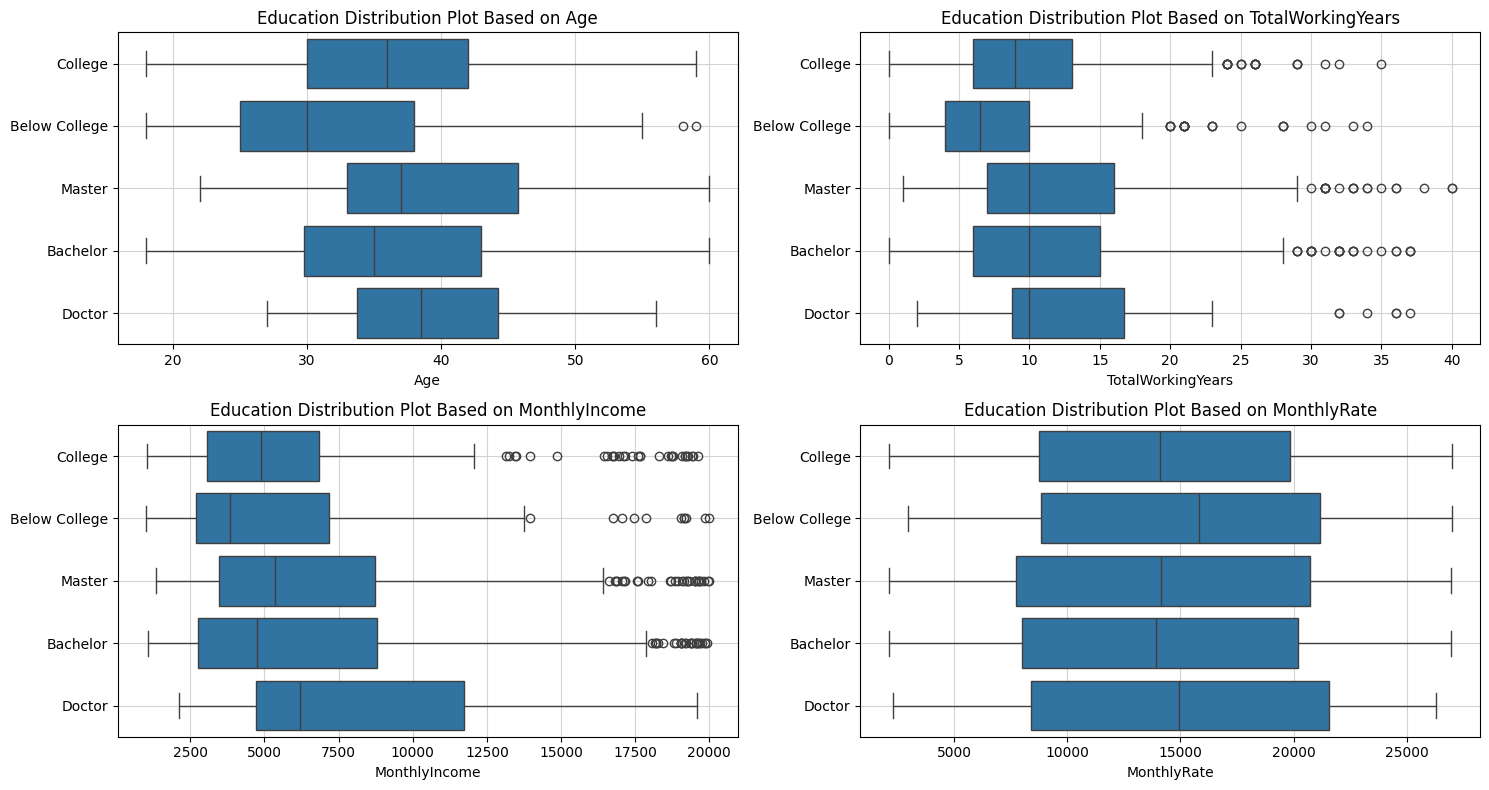

In [24]:
numerical_dis_plot(
    features=['Age', 'TotalWorkingYears', 'MonthlyIncome', 'MonthlyRate'],
    df=df,
    segment_feature='Education'
)

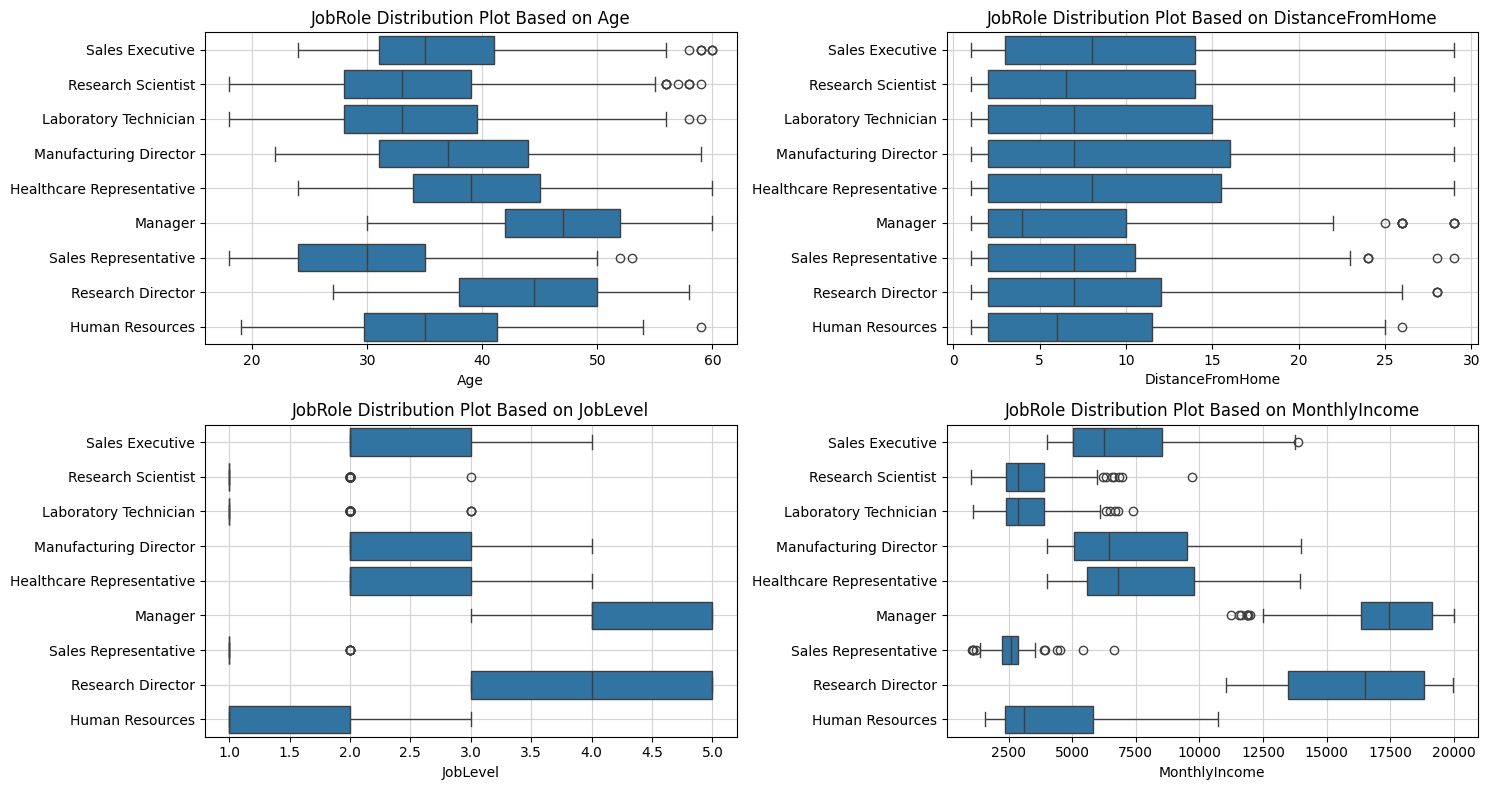

In [25]:
numerical_dis_plot(
    features=['Age', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome'],
    df=df,
    segment_feature='JobRole'
)

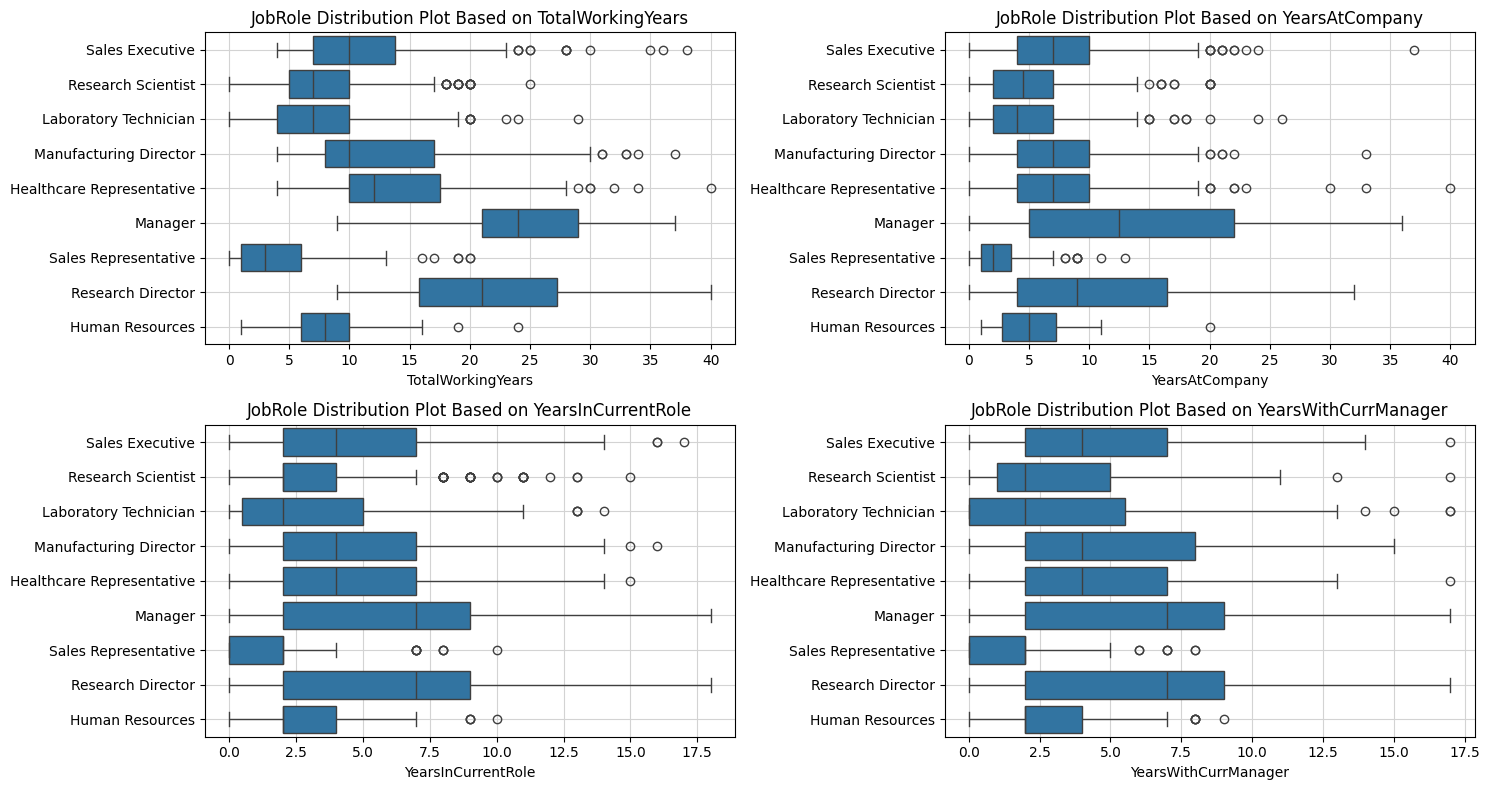

In [26]:
numerical_dis_plot(
    features=['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'],
    df=df,
    segment_feature='JobRole'
)

In [27]:
# @title ### 2.3.2 Categorical Multivariate Analysis
def categorical_dis_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1, figsize=(16, 18))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, x=segment_feature, hue=feature, ax=ax[i])
            ax[i].set_title(f'{segment_feature} Distribution Plot Based on {feature}')
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
            ax[i].set_title(f'{feature} Distribution Plot')

        for bar in ax[i].patches:
            ax[i].annotate(
                str(int(bar.get_height())),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', fontsize=10)

        ax[i].set_ylabel(None)
        ax[i].grid(True, color='lightgray')

    plt.tight_layout()
    plt.show()

Distribution of categorical features by Job Role

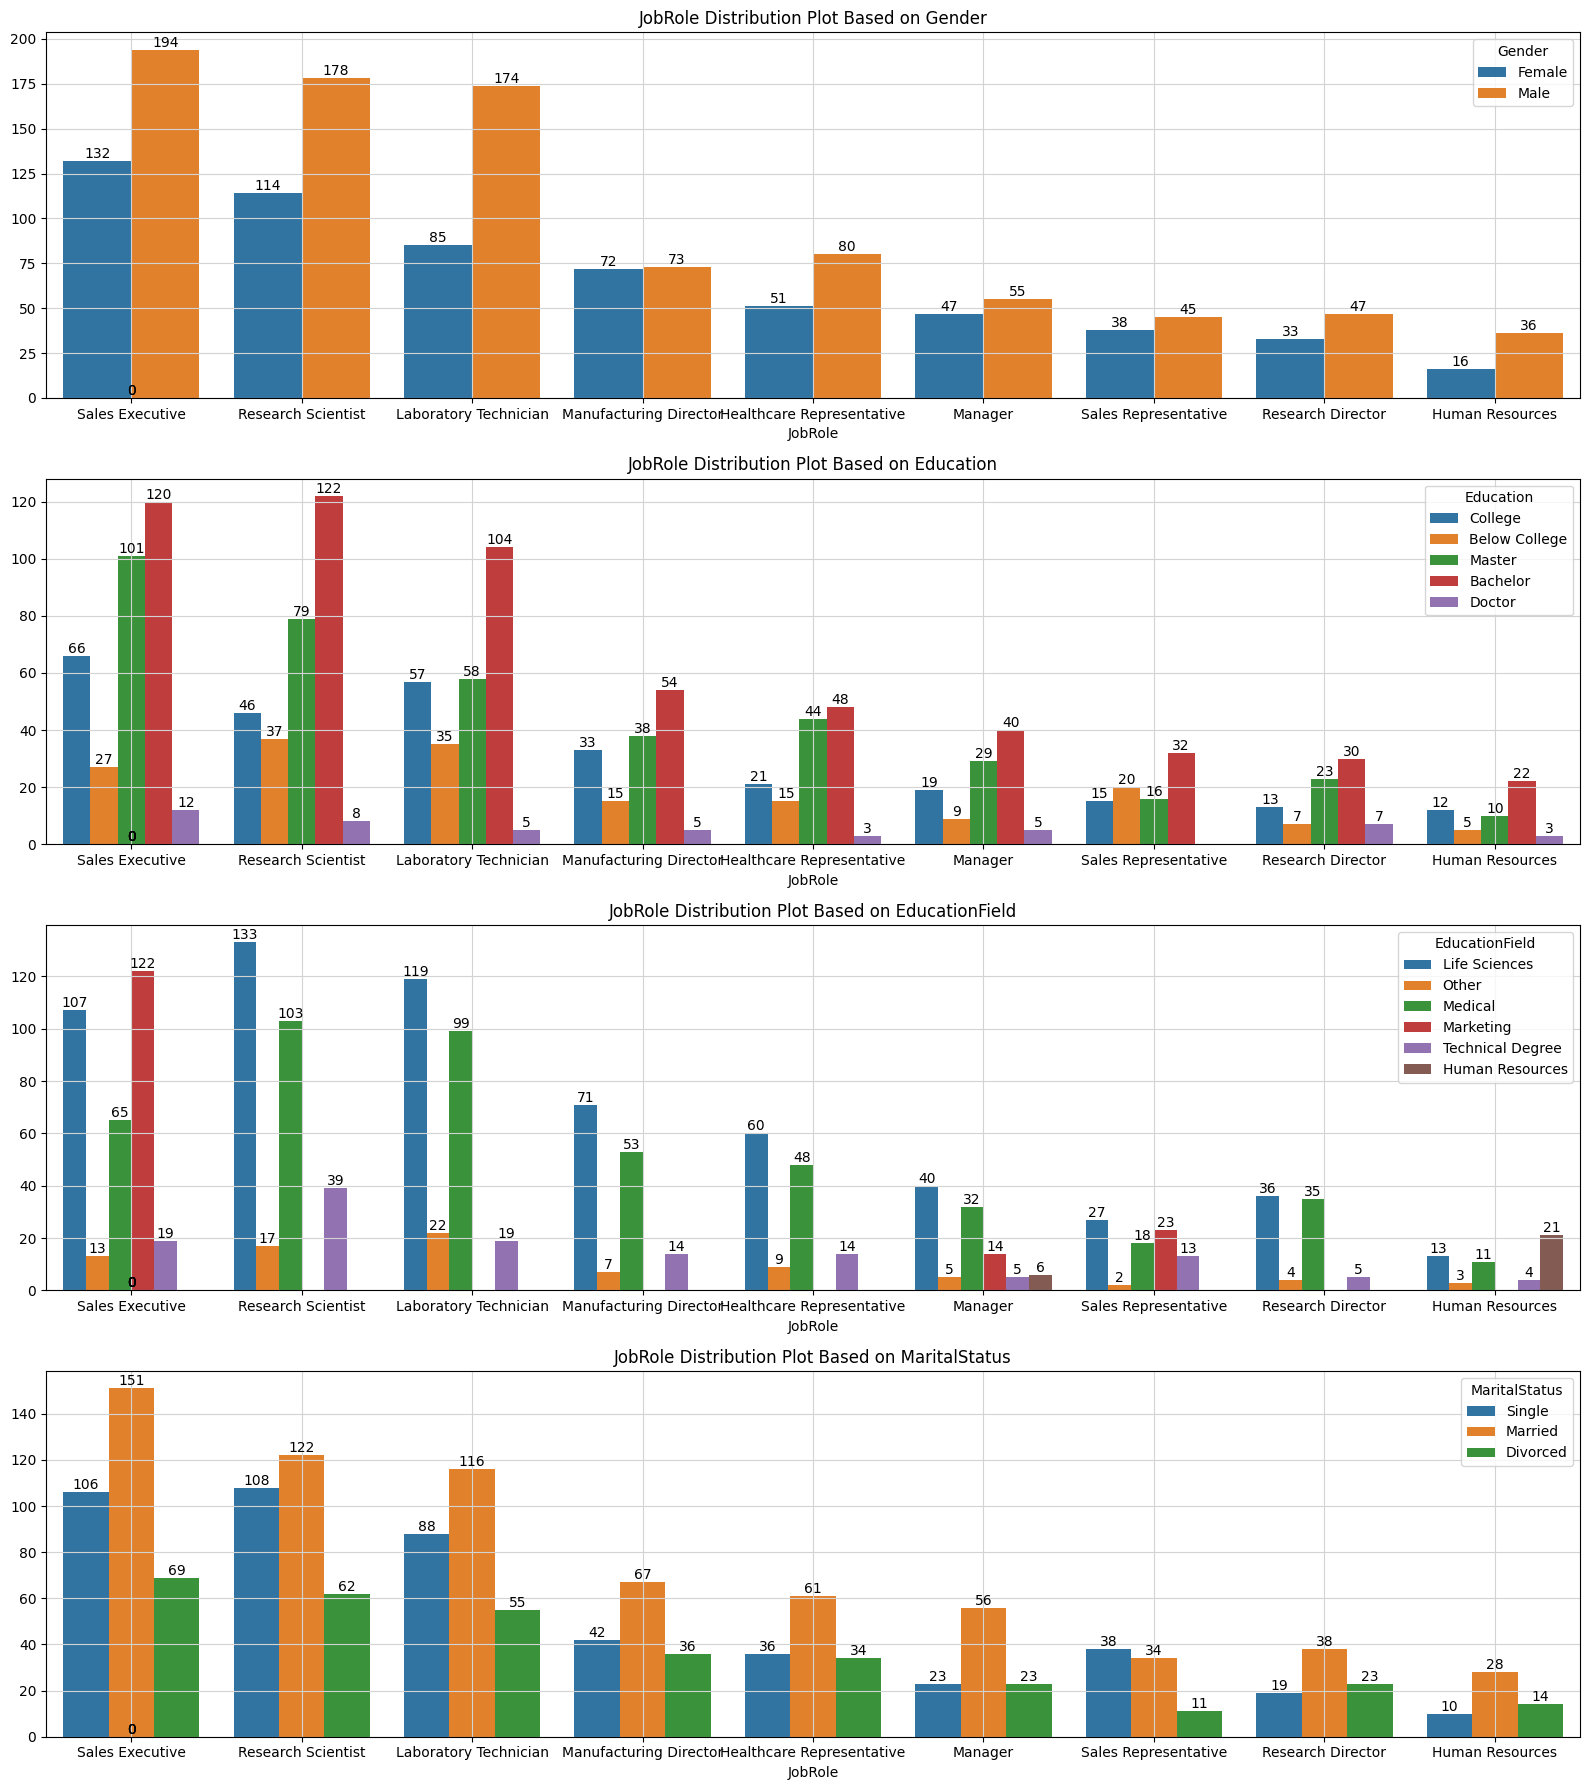

In [28]:
categorical_dis_plot(
    features=['Gender', 'Education', 'EducationField', 'MaritalStatus'],
    df=df,
    segment_feature='JobRole'
)

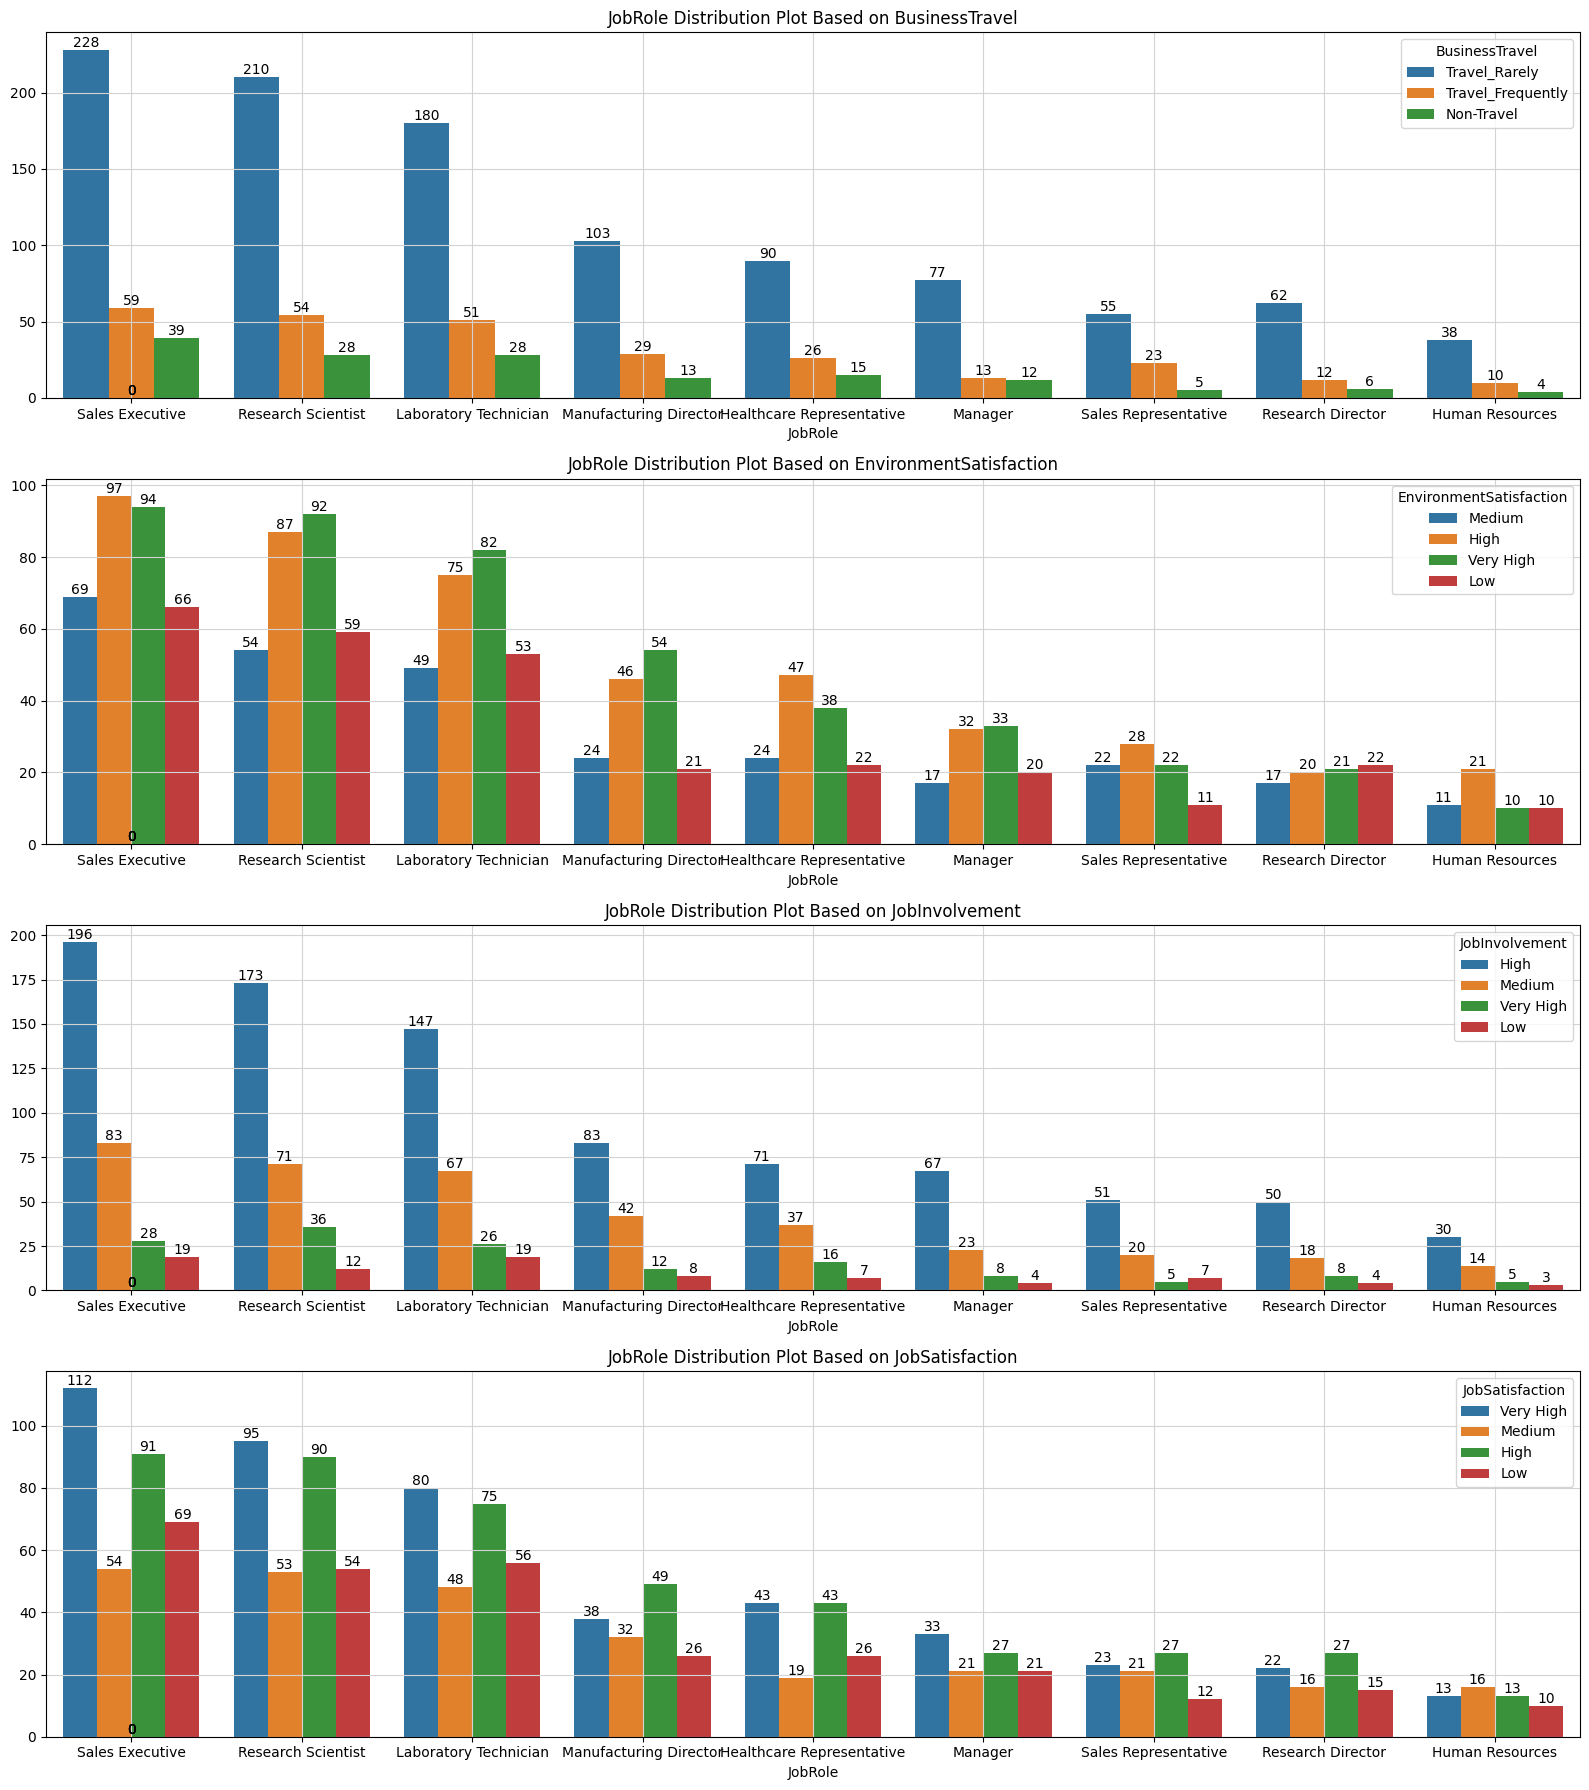

In [29]:
categorical_dis_plot(
    features=['BusinessTravel', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction'],
    df=df,
    segment_feature='JobRole'
)

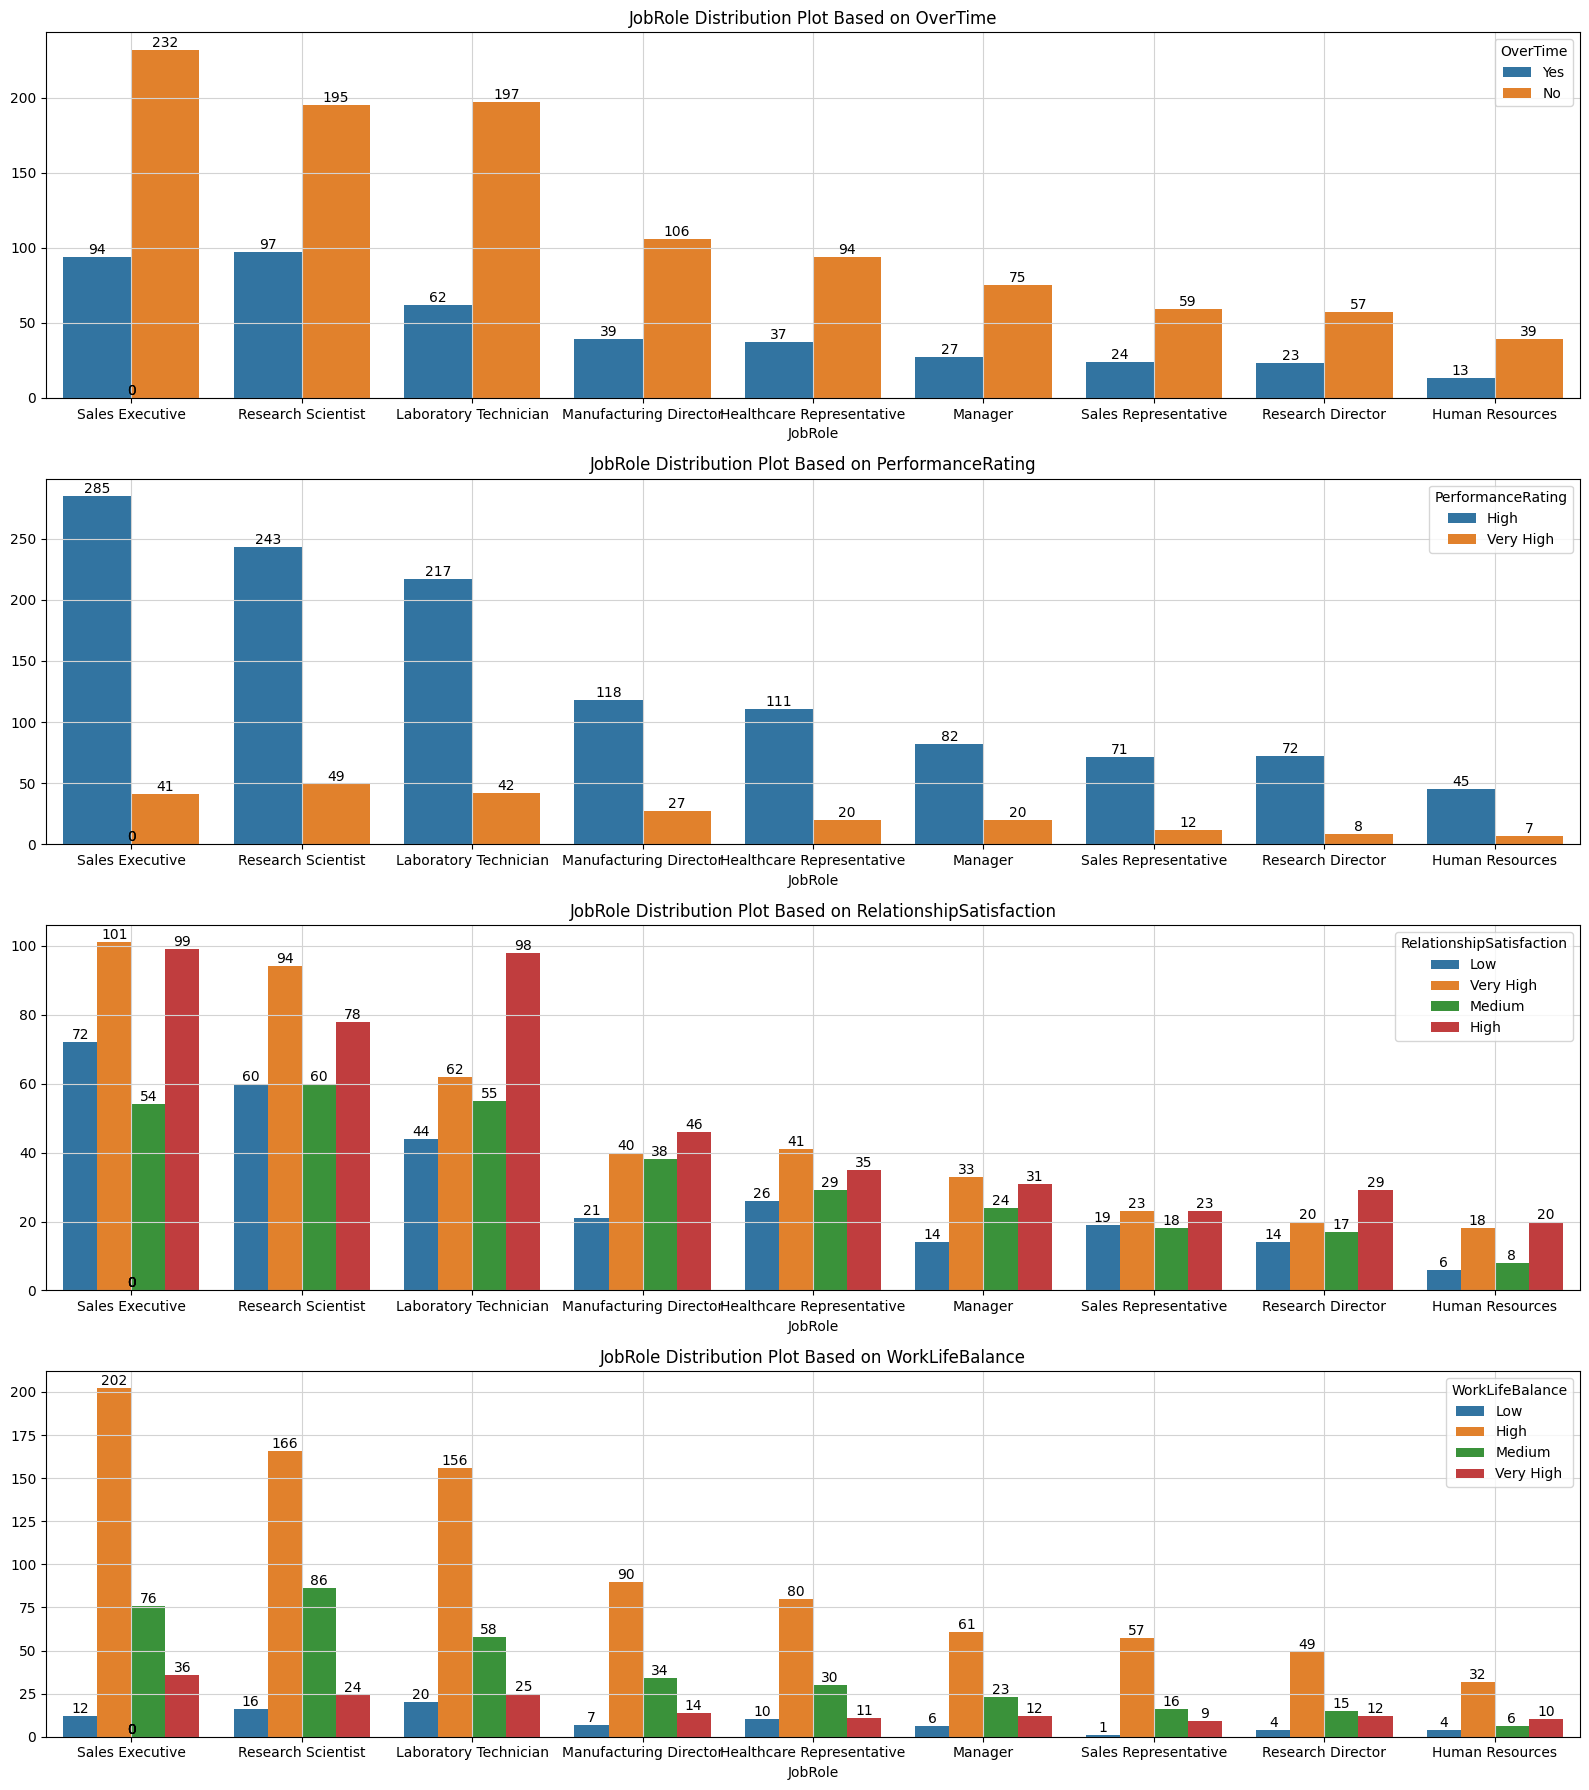

In [30]:
categorical_dis_plot(
    features=['OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'],
    df=df,
    segment_feature='JobRole'
)

Distribution of categorical features by Department

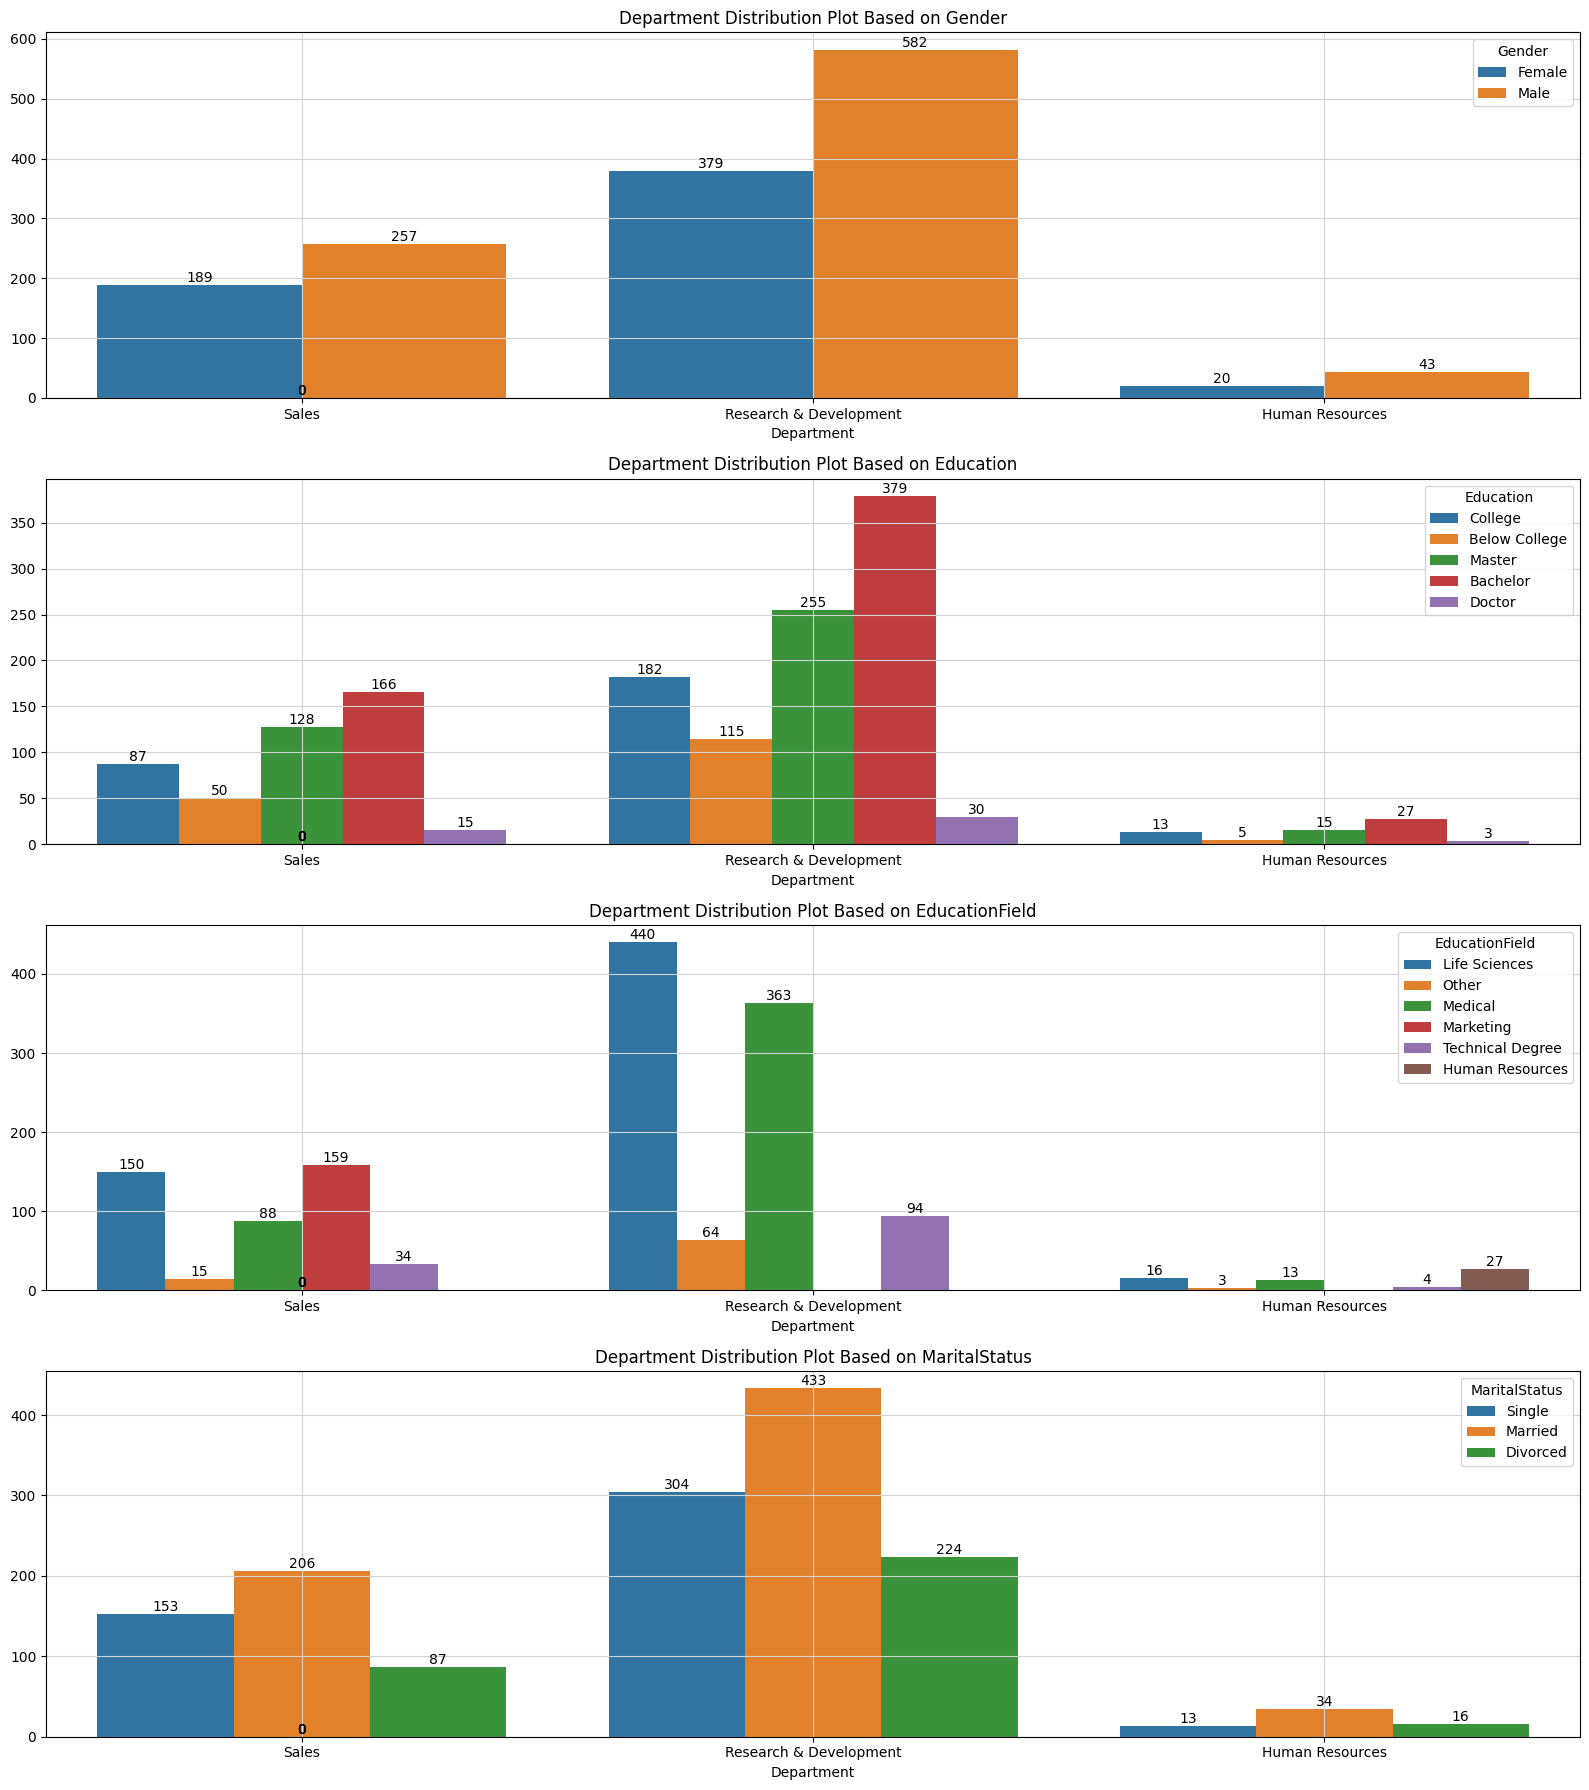

In [31]:
categorical_dis_plot(
    features=['Gender', 'Education', 'EducationField', 'MaritalStatus'],
    df=df,
    segment_feature='Department'
)

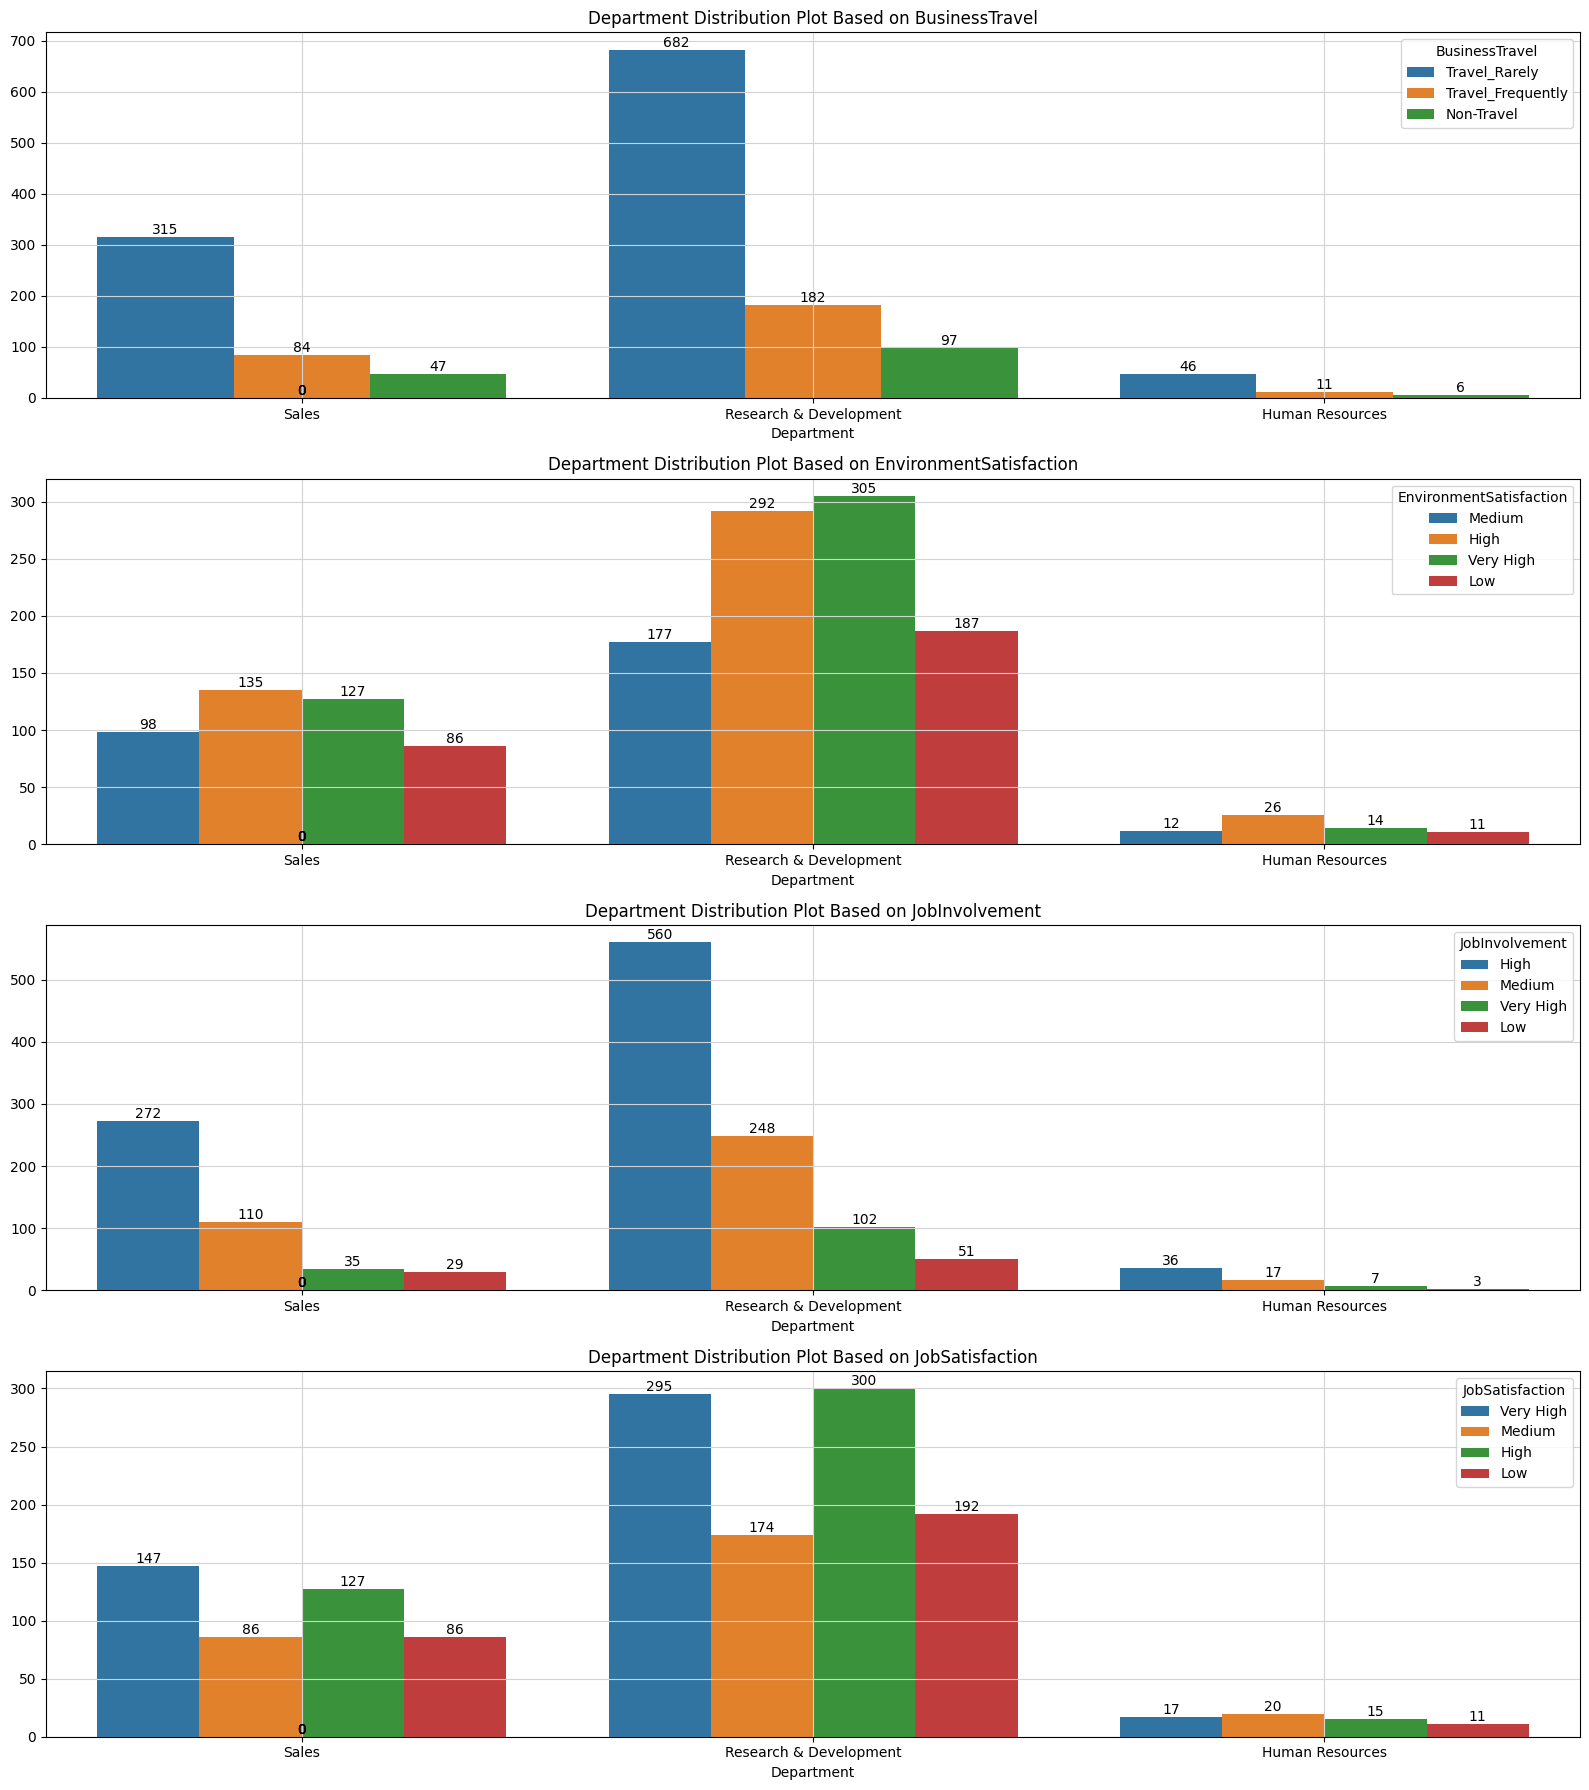

In [32]:
categorical_dis_plot(
    features=['BusinessTravel', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction'],
    df=df,
    segment_feature='Department'
)

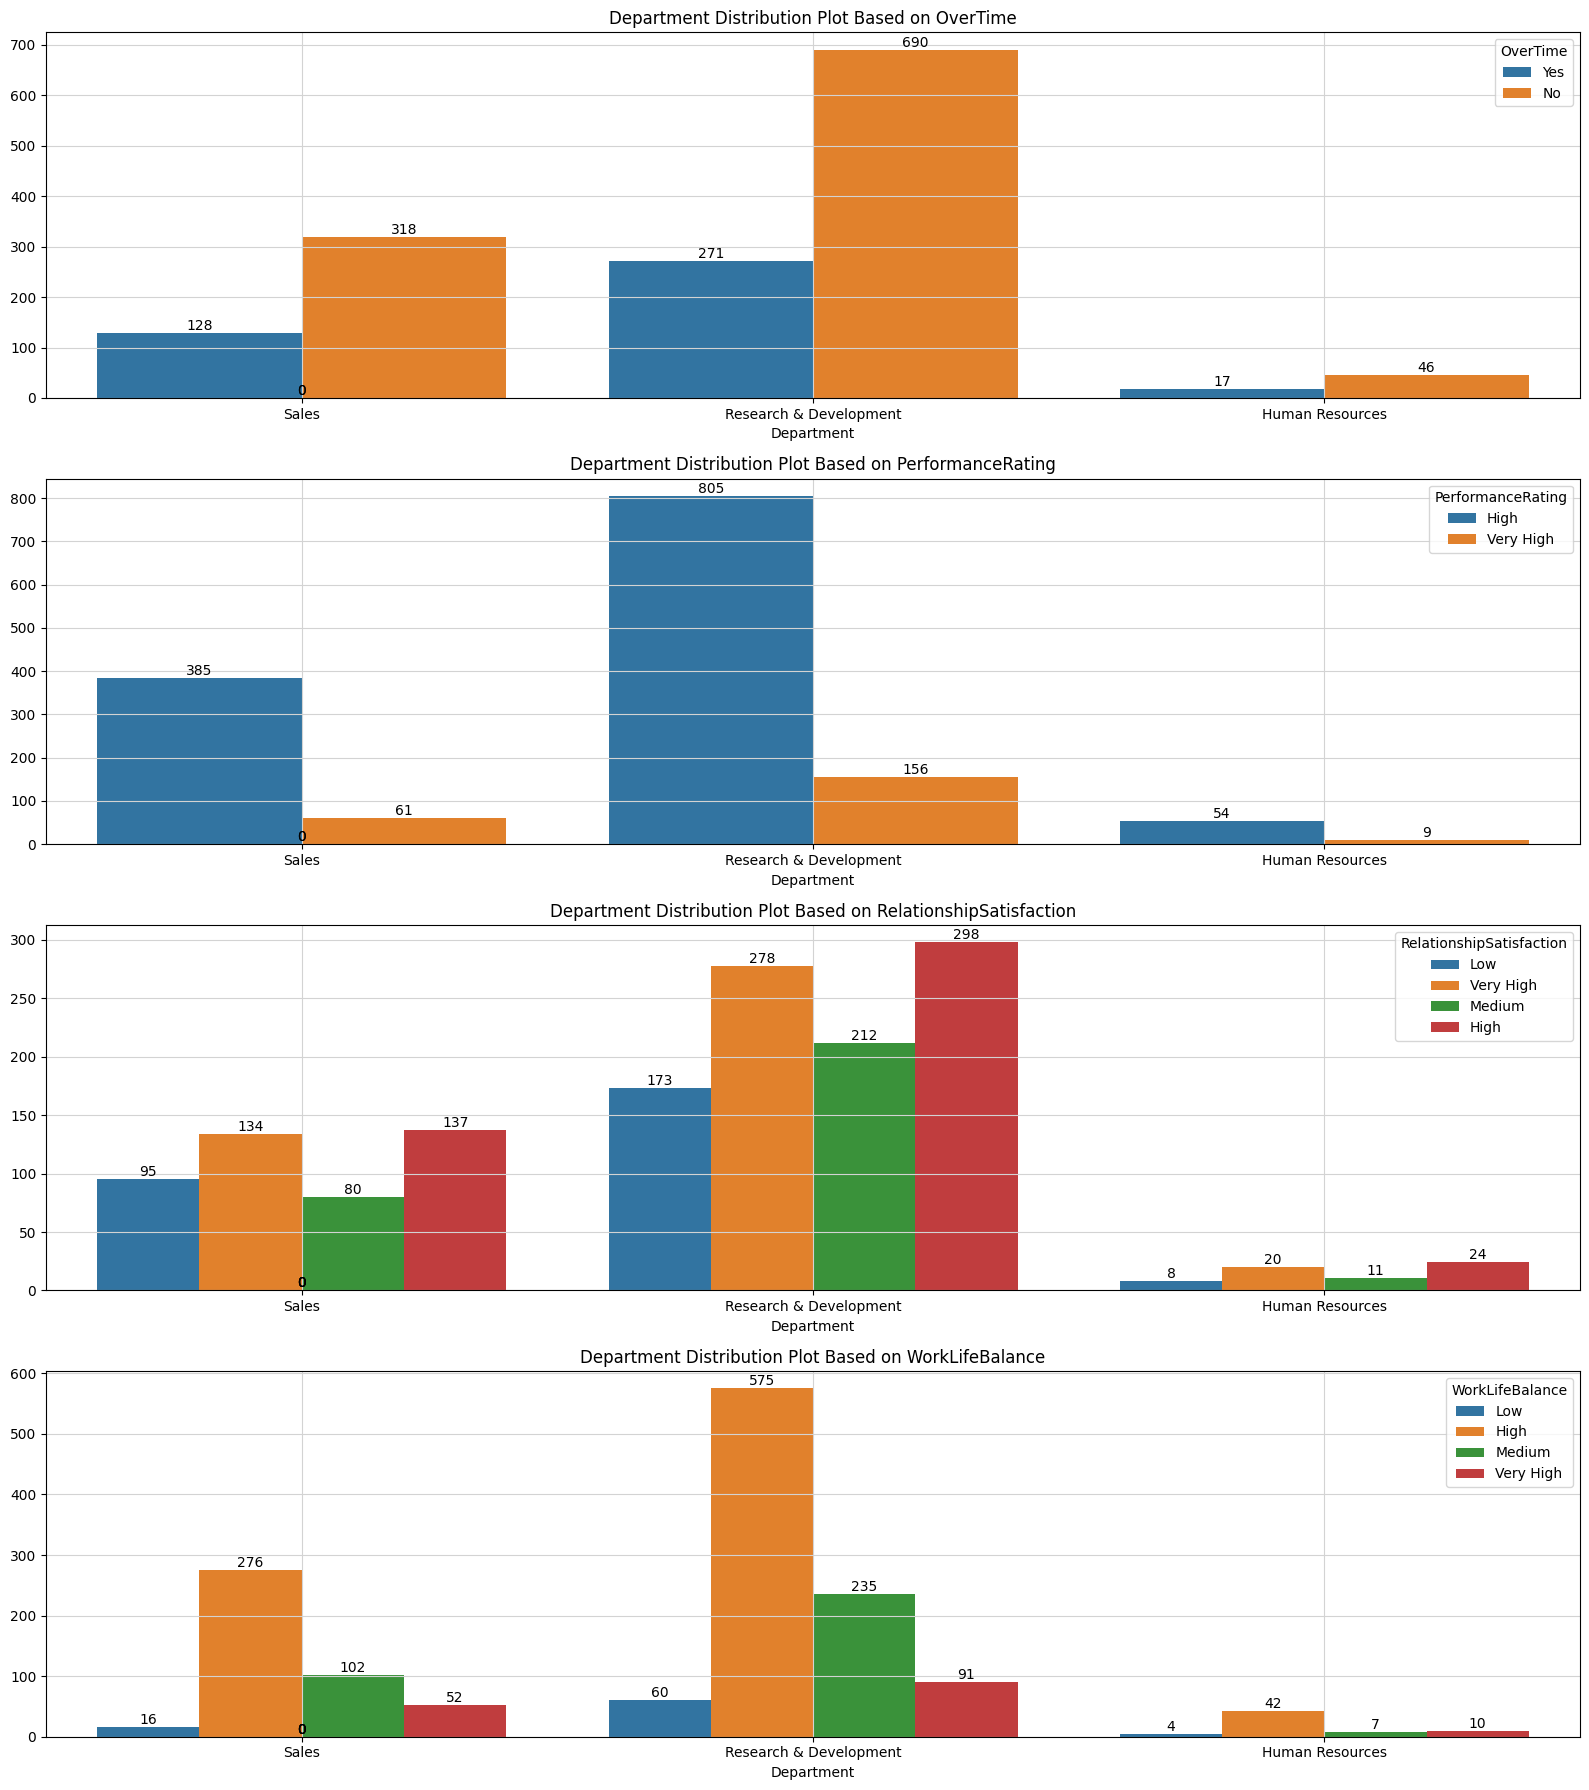

In [33]:
categorical_dis_plot(
    features=['OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'],
    df=df,
    segment_feature='Department'
)

### 2.3.3 Comparison of Attrition Features

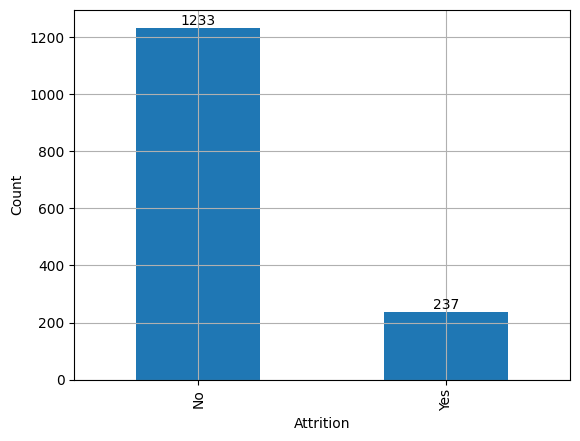

In [34]:
ax = df['Attrition'].value_counts().plot(kind='bar')
ax.grid()
ax.set_ylabel('Count')

for bar in ax.patches:
    ax.annotate(str(bar.get_height()),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', fontsize=10)

Based on the Attrition plot above, the number of employees who did not perform attrition (`0`) was greater than those who perform attrition (`1`), so it can be concluded that the data is not balanced or imbalanced data condition.

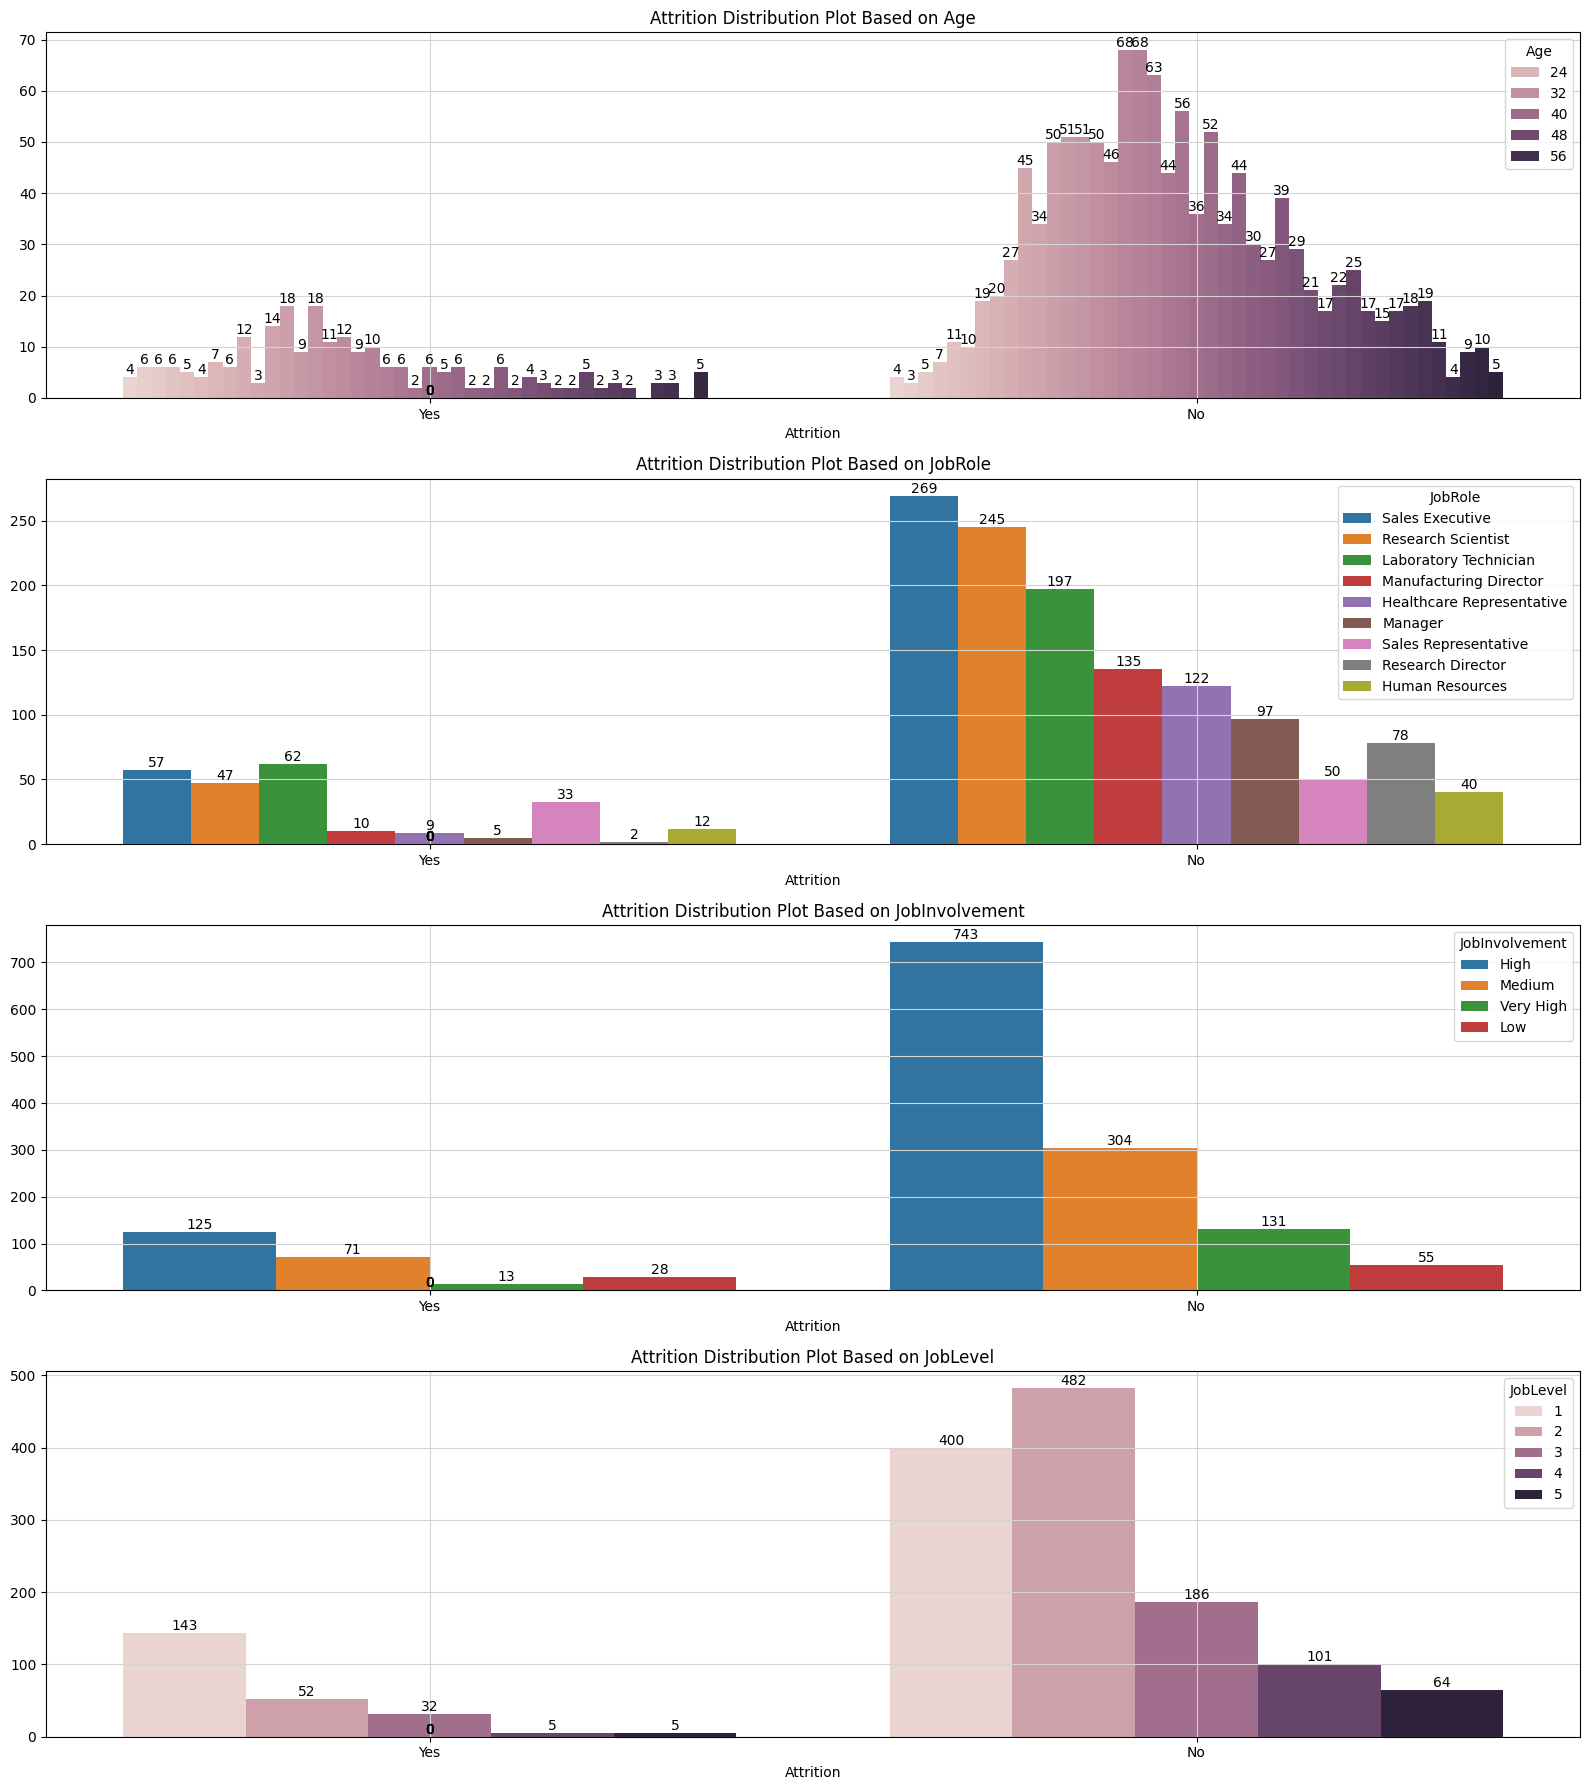

In [35]:
categorical_dis_plot(
    features=['Age', 'JobRole', 'JobInvolvement', 'JobLevel'],
    df=df,
    segment_feature='Attrition'
)

From the Attrition plot above, we can conclude:
1. Based on the age, the number of employees who perform attrition when they are 19 years old, and in their twenties and thirties. While the highest attrition rate is at the age of 31. And employees in their fifties such as 53, 54, 57, 59 actually prefer to stay in their company.
2.  Based on the job role, the number of employees who have the highest attrition is those who have the role of Laboratory technician, while the least is those who have the role of Research Director. In addition, employees who have the role of Sales Representative have a fairly high attrition rate that is almost close to the overall population.
3. Based on the job involvement, employees who have low job involvement have a tendency to perform attrition which is clearly seen to be close to the population as a whole.
4. Based on the job level, the higher the job level, the smaller the tendency for employees to perform attrition.

# **3. Data Preprocessing**

In [36]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Medium,...,Low,80,0,8,0,Low,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,High,...,Very High,80,1,10,3,High,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Very High,...,Medium,80,0,7,3,High,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,Very High,...,High,80,0,8,3,High,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,7,Low,...,Very High,80,1,6,3,High,2,2,2,2


In this dataset, the label features used are attrition, whether the employee left the company (1 for yes), and whether or not the employee stayed and left the company (0 for no).

## **3.1 Feature Selection**

Because there are several features that do not contribute or influence the attrition rate in this dataset, for example EmployeeID, these feature need to be removed so that the Machine Learning model only trains the model from the most influential data feature.

## **3.2 Label Encoding**

In [37]:
numerical, categorical = [], []

for feature in df.columns:
    if df[feature].dtype != 'object':
        numerical.append(feature)
    else:
        categorical.append(feature)

In [38]:
# Categorical features that need to be encoded
categorical

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance']

In [39]:
le = LabelEncoder()
df[categorical] = df[categorical].apply(le.fit_transform)

## **3.3 Data Normalization**

In [40]:
# Numerical features that need to be normalized
numerical

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'JobLevel',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [41]:
scaler = MinMaxScaler()
df[numerical] = scaler.fit_transform(df[numerical])

## **3.4 Data Checking**

In [42]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1,2,0.715820,2,0.000000,2,1,0.000000,2,...,1,0.0,0.000000,0.200,0.0,1,0.15,0.222222,0.000000,0.294118
1,0.738095,0,1,0.126700,1,0.250000,1,1,0.000484,0,...,3,0.0,0.333333,0.250,0.5,0,0.25,0.388889,0.066667,0.411765
2,0.452381,1,2,0.909807,1,0.035714,2,4,0.001451,3,...,2,0.0,0.000000,0.175,0.5,0,0.00,0.000000,0.000000,0.000000
3,0.357143,0,1,0.923407,1,0.071429,4,1,0.001935,3,...,0,0.0,0.000000,0.200,0.5,0,0.20,0.388889,0.200000,0.000000
4,0.214286,0,2,0.350036,1,0.035714,1,3,0.002903,1,...,3,0.0,0.333333,0.150,0.5,0,0.05,0.111111,0.133333,0.117647


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   int64  
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   int64  
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   int64  
 8   EmployeeNumber            1470 non-null   float64
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   int64  
 11  HourlyRate                1470 non-null   float64
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   float64
 14  JobRole 

In [44]:
df.describe().round(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.0000,1470.0000,1470.0000,1470.0000,1470.0000,1470.0000,1470.0000,1470.0000,1470.0000,1470.0000,...,1470.0000,1470.0,1470.0000,1470.0000,1470.0000,1470.0000,1470.0000,1470.0000,1470.0000,1470.0000
mean,0.4506,0.1612,1.6075,0.5014,1.2605,0.2926,1.6803,2.2476,0.4953,1.4939,...,1.4816,0.0,0.2646,0.2820,0.4666,0.8347,0.1752,0.2350,0.1459,0.2425
std,0.2175,0.3679,0.6655,0.2888,0.5278,0.2895,1.6393,1.3314,0.2913,1.2141,...,1.2095,0.0,0.2840,0.1945,0.2149,1.1097,0.1532,0.2013,0.2148,0.2099
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.2857,0.0000,1.0000,0.2598,1.0000,0.0357,0.0000,1.0000,0.2372,0.0000,...,0.0000,0.0,0.0000,0.1500,0.3333,0.0000,0.0750,0.1111,0.0000,0.1176
50%,0.4286,0.0000,2.0000,0.5011,1.0000,0.2143,1.0000,2.0000,0.4932,1.0000,...,1.5000,0.0,0.3333,0.2500,0.5000,0.0000,0.1250,0.1667,0.0667,0.1765
75%,0.5952,0.0000,2.0000,0.7552,2.0000,0.4643,4.0000,3.0000,0.7522,3.0000,...,3.0000,0.0,0.3333,0.3750,0.5000,2.0000,0.2250,0.3889,0.2000,0.4118
max,1.0000,1.0000,2.0000,1.0000,2.0000,1.0000,4.0000,5.0000,1.0000,3.0000,...,3.0000,0.0,1.0000,1.0000,1.0000,3.0000,1.0000,1.0000,1.0000,1.0000


## **3.5 Data Splitting**

In [45]:
# Split the data into independent variable (X) and dependent variable (y) as a label
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

In [46]:
# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,  random_state=20241116, stratify=y)

print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test  :', X_test.shape)
print('y_test  :', y_test.shape)

X_train : (1176, 32)
y_train : (1176,)
X_test  : (294, 32)
y_test  : (294,)


# **4. Modelling**

In [47]:
# Models and metrics initialization
models, accuracy, precision, recall, f1 = {}, {}, {}, {}, {}

models['LR'] = LogisticRegression(class_weight='balanced', max_iter=10000)
models['SVM'] = SVC(class_weight='balanced', max_iter=10000)
models['DT'] = DecisionTreeClassifier(class_weight='balanced')
models['GB'] = GradientBoostingClassifier()
models['RF'] = RandomForestClassifier(class_weight='balanced')
models['KNN'] = KNeighborsClassifier()
models['NB'] = GaussianNB()

for i in models.keys():
    models[i].fit(X_train, y_train)

    pred = models[i].predict(X_test)

    accuracy[i] = accuracy_score(pred, y_test)
    precision[i] = precision_score(pred, y_test)
    recall[i] = recall_score(pred, y_test)
    f1[i] = f1_score(pred, y_test)

In [48]:
model_metrics = pd.DataFrame({
    'Accuracy': accuracy.values(),
    'Precision': precision.values(),
    'Recall': recall.values(),
    'F1-Score': f1.values()
}, index=models.keys())

model_metrics

,Accuracy,Precision,Recall,F1-Score
LR,0.744898,0.659574,0.344444,0.452555
SVM,0.751701,0.617021,0.345238,0.442748
DT,0.809524,0.446809,0.411765,0.428571
GB,0.874150,0.297872,0.777778,0.430769
RF,0.850340,0.106383,0.714286,0.185185
KNN,0.819728,0.042553,0.200000,0.070175
NB,0.734694,0.595745,0.321839,0.417910


Based on the evaluation metrics for each model, the Gradient Boosting Classifier has the highest model accuracy among the others, so this model will be used.

In [49]:
model_gb = GradientBoostingClassifier().fit(X_train, y_train)
model_gb

GradientBoostingClassifier()

In [50]:
y_train_gb = model_gb.predict(X_train)
y_test_gb = model_gb.predict(X_test)

# **5. Evaluation**

In [51]:
# @title ## **5.1 Evaluation Report Model**
def evaluation_report(y_train, y_predicted, title='Data'):
    print('Classification Report on ' + title)
    print(classification_report(y_train, y_predicted))

    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_train, y_predicted), annot=True, fmt='d')
    plt.title('Confusion Matrix on ' + title)
    plt.ylabel('True Label Attrition', fontsize=10)
    plt.xlabel('Predicted Label Attrition', fontsize=10)
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    plt.show()

Classification Report on Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       986
           1       0.99      0.70      0.82       190

    accuracy                           0.95      1176
   macro avg       0.97      0.85      0.90      1176
weighted avg       0.95      0.95      0.95      1176



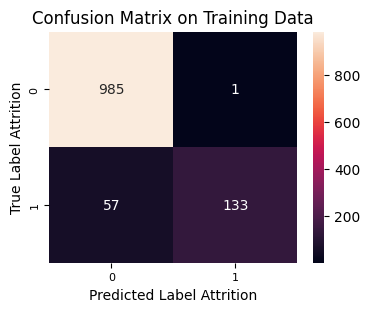

In [52]:
evaluation_report(y_train, y_train_gb, title='Training Data')

Classification Report on Testing Data
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1       0.74      0.30      0.42        47

    accuracy                           0.87       294
   macro avg       0.81      0.64      0.68       294
weighted avg       0.86      0.87      0.85       294



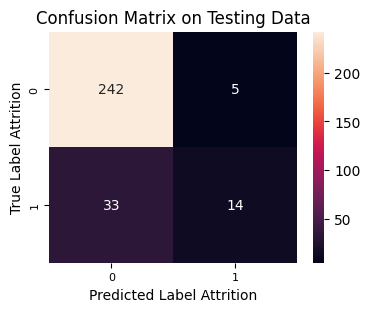

In [53]:
evaluation_report(y_test, y_test_gb, title='Testing Data')

## **5.2 Hyperparameter Tuning**

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load Data (Ensure X_train and y_train are ready)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define Gradient Boosting Model with Class Weighting
model_gb = GradientBoostingClassifier(loss='log_loss', n_estimators=150, max_depth=5)

# Adjusted Hyperparameter Grid for Higher Recall & F1
param_grid = {
    'learning_rate': [0.1, 0.05],  # Smaller learning rate improves recall
    'n_estimators': [150, 200],  # More trees help capture patterns
    'min_samples_split': [1, 3, 5],  # Lower values for flexibility
    'min_samples_leaf': [1, 3],  # Allows smaller class 1 splits
    'max_depth': [5, 7],  # Keeps trees deep enough for patterns
    'subsample': [0.8, 1.0]  # Helps reduce overfitting
}

# Use RandomizedSearchCV with Recall Focus
clf = RandomizedSearchCV(
    estimator=model_gb,
    param_distributions=param_grid,
    n_iter=5,  # Test only 5 random combinations
    cv=3,  # Keeps cross-validation for generalization
    n_jobs=-1,  # Uses all CPU cores
    scoring='recall',  # Focuses on improving recall for class 1
    verbose=2
)

# Fit Model on Resampled Data
clf.fit(X_train_resampled, y_train_resampled)

# Show Best Parameters
print("✅ Best Parameters for Higher Recall & F1-Score:", clf.best_params_)

# Predict on Test Data
y_pred = clf.best_estimator_.predict(X_test)

# Classification Report
from sklearn.metrics import classification_report
print("📊 Classification Report on Test Data:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_pa

✅ Best Parameters for Higher Recall & F1-Score: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 7, 'learning_rate': 0.05}
📊 Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       247
           1       0.48      0.26      0.33        47

    accuracy                           0.84       294
   macro avg       0.67      0.60      0.62       294
weighted avg       0.81      0.84      0.82       294



In [63]:

# Fit for the best model params estimators
best_model = clf.fit(X_train, y_train)
best_model.best_estimator_


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_pa

GradientBoostingClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=5,
                           n_estimators=150)

Classification Report on Training Data Best Model
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       986
           1       1.00      0.69      0.82       190

    accuracy                           0.95      1176
   macro avg       0.97      0.84      0.89      1176
weighted avg       0.95      0.95      0.95      1176



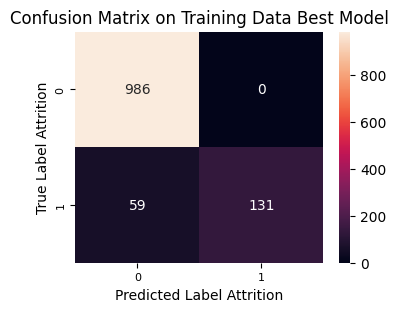

In [64]:


evaluation_report(y_train, y_train_best, title='Training Data Best Model')

Classification Report on Testing Data Best Model
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       247
           1       0.50      0.17      0.25        47

    accuracy                           0.84       294
   macro avg       0.68      0.57      0.58       294
weighted avg       0.80      0.84      0.81       294



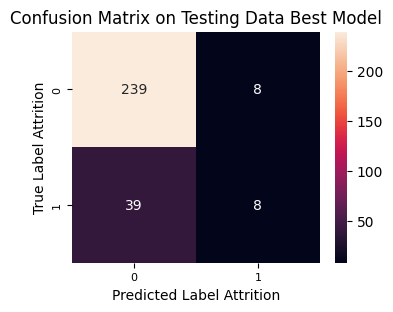

In [65]:

evaluation_report(y_test, y_test_best, title='Testing Data Best Model')

# **6 Model Export and Project Requirements**

In [66]:
import joblib

# Save the trained model
joblib.dump(best_model, 'employee_attrition_model.pkl')

print("✅ Model saved successfully!")


✅ Model saved successfully!


In [67]:
import joblib

# After training your model
joblib.dump(clf.best_estimator_, "employee_attrition_model.pkl")  # Save Model
joblib.dump(X_train.columns, "training_columns.pkl")  # Save Feature Names
print("✅ Model and training columns saved!")


✅ Model and training columns saved!
